### Import the libraries

In [2]:
#the basics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import regex as re

#NLP
import nltk
import word2number as w2n
from nltk.tokenize import wordpunct_tokenize
from nltk.stem import WordNetLemmatizer
from collections import Counter
from wordcloud import WordCloud

#vectorisation
import gensim
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer

#modelling
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
from sklearn import metrics

### loading in the data and creating one joined dataframe

In [3]:
#read in the first kaggle dataframe
df_old = pd.read_csv(r'C:\Users\odcro\Documents\Digital Futures\CAPSTONE\winemag-data-130k-v2.csv')
df_old.head(200)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,195,Italy,"This is a mature, jammy wine with thick layers...",Riserva,87,35.0,Tuscany,Vino Nobile di Montepulciano,NaN,NaN,NaN,Carpineto 2003 Riserva (Vino Nobile di Montep...,Prugnolo Gentile,Carpineto
196,196,Italy,Pancole is a pretty expression of Tuscany's po...,Pancole,87,18.0,Tuscany,Vernaccia di San Gimignano,NaN,NaN,NaN,Cesani 2007 Pancole (Vernaccia di San Gimignano),Vernaccia,Cesani
197,197,South Africa,"This is a concentrated, fairly full and lush C...",21 Gables,90,23.0,Western Cape,NaN,NaN,Lauren Buzzeo,@laurbuzz,Spier 2014 21 Gables Chenin Blanc (Western Cape),Chenin Blanc,Spier
198,198,US,"This is a soft, well-crafted wine from the eas...",Four Soil Mélange,90,60.0,California,Napa Valley,Napa,Virginie Boone,@vboone,Sequum 2013 Four Soil Mélange Cabernet Sauvign...,Cabernet Sauvignon,Sequum


In [4]:
#read in the second kaggle dataframe
df_new = pd.read_csv(r'C:\Users\odcro\Documents\Digital Futures\CAPSTONE\winemag-data-2017-2020.csv')
df_new.head(200)

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_photo,taster_twitter_handle,title,variety,vintage,winery
0,Portugal,This is a deliciously creamy wine with light w...,Assobio Branco,87,14.0,Douro,NaN,NaN,Roger Voss,https://253qv1sx4ey389p9wtpp9sj0-wpengine.netd...,@vossroger,Quinta dos Murças 2016 Assobio Branco White (D...,Portuguese White,2016,Quinta dos Murças
1,US,"Black plum juice, black pepper, caramel and sm...",NaN,87,25.0,California,Paso Robles,Central Coast,Matt Kettmann,https://253qv1sx4ey389p9wtpp9sj0-wpengine.netd...,@mattkettmann,Western Slope 2014 Cabernet Sauvignon (Paso Ro...,Cabernet Sauvignon,2014,Western Slope
2,Georgia,Aromas of green apple and white flowers prepar...,NaN,87,14.0,Lechkhumi,NaN,NaN,Mike DeSimone,https://253qv1sx4ey389p9wtpp9sj0-wpengine.netd...,@worldwineguys,Teliani Valley 2015 Tsolikouri (Lechkhumi),Tsolikouri,2015,Teliani Valley
3,Kosovo,"This wine has aromas of black berry, dried red...",NaN,87,13.0,Rahoveci Valley,NaN,NaN,Jeff Jenssen,https://253qv1sx4ey389p9wtpp9sj0-wpengine.netd...,@worldwineguys,Stone Castle 2013 Shiraz (Rahoveci Valley),Shiraz,2013,Stone Castle
4,Italy,"A blend of organically cultivated Groppello, M...",San'Emiliano Chiaretto,87,13.0,Lombardy,Valtènesi,NaN,Kerin O’Keefe,https://253qv1sx4ey389p9wtpp9sj0-wpengine.netd...,@kerinokeefe,Pratello 2016 San'Emiliano Chiaretto Rosato (V...,Rosato,2016,Pratello
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,Italy,The nose is rather shy but eventually reveals ...,Vizzarro,88,30.0,Central Italy,Montepulciano d'Abruzzo Colline Teramane,NaN,Kerin O’Keefe,https://253qv1sx4ey389p9wtpp9sj0-wpengine.netd...,@kerinokeefe,Barone Cornacchia 2011 Vizzarro (Montepulcian...,Montepulciano,2011,Barone Cornacchia
196,US,This smooth and toasty effort offers aromatic ...,Estate Grown,88,27.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,https://253qv1sx4ey389p9wtpp9sj0-wpengine.netd...,@paulgwine,Benton-Lane 2014 Estate Grown Pinot Noir (Will...,Pinot Noir,2014,Benton-Lane
197,France,"This is an attractive, crisp and fruity wine. ...",Château Tour Blanche,88,29.0,Bordeaux,Médoc,NaN,Roger Voss,https://253qv1sx4ey389p9wtpp9sj0-wpengine.netd...,@vossroger,Bernard Magrez 2014 Château Tour Blanche (Médoc),Bordeaux-style Red Blend,2014,Bernard Magrez
198,France,"The second wine of Château le Prieuré, made fr...",Délice du Prieuré,88,27.0,Bordeaux,Saint-Émilion,NaN,Roger Voss,https://253qv1sx4ey389p9wtpp9sj0-wpengine.netd...,@vossroger,Château le Prieuré 2014 Délice du Prieuré (Sa...,Merlot,2014,Château le Prieuré


In [5]:
#some compairson of the columns, important in the formatting process
print(df_old.columns)
print(df_new.columns)

Index(['Unnamed: 0', 'country', 'description', 'designation', 'points',
       'price', 'province', 'region_1', 'region_2', 'taster_name',
       'taster_twitter_handle', 'title', 'variety', 'winery'],
      dtype='object')
Index(['country', 'description', 'designation', 'points', 'price', 'province',
       'region_1', 'region_2', 'taster_name', 'taster_photo',
       'taster_twitter_handle', 'title', 'variety', 'vintage', 'winery'],
      dtype='object')


In [6]:
len(df_old.columns) == len(df_new.columns) #columns discrepencies

False

In [7]:
##check if unnamed is all unique if yes can just drop it bcs its just a repeat of the index

## Is the unnamed column just a poorly sampled index? -- i.e. unique values

###we think that they jst didnt remove idnex so can check uniqueness, 100% inque means every one is ind. so yes an index
print("Percentage of unique values for the unnamed label proportional to the data\
        : {}".format(len(df_old['Unnamed: 0'].unique())/len(df_old)*100))

Percentage of unique values for the unnamed label proportional to the data        : 100.0


In [8]:
##okay so we can now drop this col:
df_old.drop(columns = ['Unnamed: 0'], inplace=True)

In [9]:
len(df_old.columns) == len(df_new.columns)  ##retry

##wrong bcs new has taster photo and vintage column

False

In [10]:
df_new.drop(columns = ['taster_photo'], inplace=True)
#so lets drop this^

In [11]:
df_old['vintage'] = df_old['title'].str.findall('(\d{4})').str.get(0)
##extract the year from the title as recommended on the metadata so that the columns match up
# aka add the vintage col to the 'old' df !

In [12]:
df_old.head(10)

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,vintage
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,2013
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,2011
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,2013
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,2013
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,2012
5,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,15.0,Northern Spain,Navarra,NaN,Michael Schachner,@wineschach,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem,2011
6,Italy,"Here's a bright, informal red that opens with ...",Belsito,87,16.0,Sicily & Sardinia,Vittoria,NaN,Kerin O’Keefe,@kerinokeefe,Terre di Giurfo 2013 Belsito Frappato (Vittoria),Frappato,Terre di Giurfo,2013
7,France,This dry and restrained wine offers spice in p...,NaN,87,24.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Trimbach 2012 Gewurztraminer (Alsace),Gewürztraminer,Trimbach,2012
8,Germany,Savory dried thyme notes accent sunnier flavor...,Shine,87,12.0,Rheinhessen,NaN,NaN,Anna Lee C. Iijima,NaN,Heinz Eifel 2013 Shine Gewürztraminer (Rheinhe...,Gewürztraminer,Heinz Eifel,2013
9,France,This has great depth of flavor with its fresh ...,Les Natures,87,27.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Jean-Baptiste Adam 2012 Les Natures Pinot Gris...,Pinot Gris,Jean-Baptiste Adam,2012


In [13]:
len(df_old.columns) == len(df_new.columns) ##retry should be true now
##AMAZING work

True

In [14]:
##lets concatonate the two df !
full_df = pd.concat([df_old, df_new])

full_df.head(100)

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,vintage
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,2013
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,2011
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,2013
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,2013
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,France,"This is a dense wine, packed with both tannins...",NaN,88,20.0,Beaujolais,Juliénas,NaN,Roger Voss,@vossroger,Henry Fessy 2015 Juliénas,Gamay,Henry Fessy,2015
96,France,The wine comes from one of the cru estates fol...,NaN,88,18.0,Beaujolais,Régnié,NaN,Roger Voss,@vossroger,Henry Fessy 2015 Régnié,Gamay,Henry Fessy,2015
97,US,A wisp of bramble extends a savory tone from n...,Ingle Vineyard,88,20.0,New York,Finger Lakes,Finger Lakes,Anna Lee C. Iijima,NaN,Heron Hill 2015 Ingle Vineyard Riesling (Finge...,Riesling,Heron Hill,2015
98,Italy,"Forest floor, menthol, espresso, cranberry and...",Dono Riserva,88,30.0,Tuscany,Morellino di Scansano,NaN,Kerin O’Keefe,@kerinokeefe,Serpaia di Endrizzi 2010 Dono Riserva (Morell...,Sangiovese,Serpaia di Endrizzi,2010


In [15]:
print(f'df shape:{df_old.shape}')
print(f'new df shape:{df_new.shape}')
print(f'full df shape:{full_df.shape}')

#129971 + 81115 = 211086 :))

df shape:(129971, 14)
new df shape:(81115, 14)
full df shape:(211086, 14)


In [16]:
#okay now lets explore the whole data frame
full_df.dtypes

country                   object
description               object
designation               object
points                     int64
price                    float64
province                  object
region_1                  object
region_2                  object
taster_name               object
taster_twitter_handle     object
title                     object
variety                   object
winery                    object
vintage                   object
dtype: object

In [17]:
# lets look at the nulls
full_df.isnull().sum()

country                      68
description                   0
designation               58784
points                        0
price                     13643
province                     68
region_1                  34160
region_2                 129354
taster_name               26394
taster_twitter_handle     32289
title                         0
variety                       1
winery                        0
vintage                    4609
dtype: int64

In [18]:
full_df.isnull().sum().sum()

299370

### dealing with nulls

In [19]:
# lets make a copy before we cause irriversiable damage
df = full_df.copy()

In [20]:
##lets explore these nulls
df[df['variety'].isnull()]

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,vintage
86909,Chile,"A chalky, dusty mouthfeel nicely balances this...",NaN,88,17.0,Maipo Valley,NaN,NaN,NaN,NaN,Carmen 1999 (Maipo Valley),NaN,Carmen,1999


In [21]:
# full_df[full_df['variety'].isnull()]
df[df['variety'].str.contains("Cabernet Sauvignon", na=False)]

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,vintage
10,US,"Soft, supple plum envelopes an oaky structure ...",Mountain Cuvée,87,19.0,California,Napa Valley,Napa,Virginie Boone,@vboone,Kirkland Signature 2011 Mountain Cuvée Caberne...,Cabernet Sauvignon,Kirkland Signature,2011
12,US,"Slightly reduced, this wine offers a chalky, t...",NaN,87,34.0,California,Alexander Valley,Sonoma,Virginie Boone,@vboone,Louis M. Martini 2012 Cabernet Sauvignon (Alex...,Cabernet Sauvignon,Louis M. Martini,2012
37,Italy,This concentrated Cabernet offers aromas of cu...,Missoni,86,21.0,Sicily & Sardinia,Sicilia,NaN,NaN,NaN,Feudi del Pisciotto 2010 Missoni Cabernet Sauv...,Cabernet Sauvignon,Feudi del Pisciotto,2010
60,US,"Syrupy and dense, this wine is jammy in plum a...",Estate,86,100.0,California,Napa Valley,Napa,Virginie Boone,@vboone,Okapi 2013 Estate Cabernet Sauvignon (Napa Val...,Cabernet Sauvignon,Okapi,2013
71,US,Big oak defines this robustly dense and extrac...,Old Vine,86,40.0,California,Alexander Valley,Sonoma,Virginie Boone,@vboone,Eco Terreno 2013 Old Vine Cabernet Sauvignon (...,Cabernet Sauvignon,Eco Terreno,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81061,Argentina,"Damp berry and plum aromas don't overpower, ho...",Reserve,84,15.0,Mendoza Province,Mendoza,NaN,Michael Schachner,@wineschach,Cruz Alta 2017 Reserve Cabernet Sauvignon (Men...,Cabernet Sauvignon,Cruz Alta,2017
81070,US,"This wine is very jammy, even syrupy, as maple...",Blend 7,84,16.0,California,Lodi,Central Valley,Jim Gordon,@gordone_cellars,Borrowed Time NV Blend 7 Cabernet Sauvignon (L...,Cabernet Sauvignon,Borrowed Time,NV
81078,US,This wine has a mix of sweet and herbal compon...,NaN,84,35.0,California,Alexander Valley,Sonoma,Virginie Boone,@vboone,Precision Wine 2018 Cabernet Sauvignon (Alexan...,Cabernet Sauvignon,Precision Wine,2018
81099,US,"This is a brawny, generous and powerful wine t...",NaN,95,95.0,California,Napa Valley,Napa,Virginie Boone,@vboone,Yao Ming 2016 Cabernet Sauvignon (Napa Valley),Cabernet Sauvignon,Yao Ming,2016


In [22]:
df['variety'].fillna("Cabernet Sauvignon", inplace = True)
##the only null in the df for vairity is a wine which when you google it, its a cabernet, so I wanted to check for these in vairety so that I am able to fill the one NA with that :)

In [23]:
df.isnull().sum()
##no more null in variety yay

country                      68
description                   0
designation               58784
points                        0
price                     13643
province                     68
region_1                  34160
region_2                 129354
taster_name               26394
taster_twitter_handle     32289
title                         0
variety                       0
winery                        0
vintage                    4609
dtype: int64

In [24]:
##twitter handle and name of reviewer is probably irrelevant can drop

##do the regions add much? why dont we just drop these columns?

##remove everyting redundant
df.drop(columns = ['taster_name', 'taster_twitter_handle', 'region_1', 'region_2'], inplace=True)

In [25]:
##nulls sig reduced
df.isnull().sum()

country           68
description        0
designation    58784
points             0
price          13643
province          68
title              0
variety            0
winery             0
vintage         4609
dtype: int64

In [26]:
#okay theres alot of nulls in vintage lets see why:
df[df['vintage'].isnull()]
##noone of these is due to the fact there is not regex properly just no year avaliable.
#4609 could be reduced or dropped! unsure right now

,country,description,designation,points,price,province,title,variety,winery,vintage
63,France,"This fat, yeasty Champagne is comprised predom...",Brut Rosé,86,58.0,Champagne,Roland Champion NV Brut Rosé (Champagne),Champagne Blend,Roland Champion,NaN
69,France,"This cooperative, based in Aÿ, has benefited f...",Brut Rosé,86,55.0,Champagne,Collet NV Brut Rosé (Champagne),Champagne Blend,Collet,NaN
237,Italy,The wine boasts a beautiful appearance thanks ...,NaN,85,18.0,Central Italy,Consorzio Vini Tipici di San Marino NV Moscato...,Moscato,Consorzio Vini Tipici di San Marino,NaN
315,Italy,"Honey, almond blossom and citrus zest are foll...",Extra Dry,86,15.0,Veneto,Bellussi NV Extra Dry (Prosecco di Valdobbiad...,Prosecco,Bellussi,NaN
326,Italy,Drying mineral tones face off with luscious pe...,Extra Dry,86,15.0,Veneto,Marsuret NV Extra Dry (Prosecco di Valdobbiad...,Prosecco,Marsuret,NaN
...,...,...,...,...,...,...,...,...,...,...
129710,US,"Dark and intriguing, this wine offers notes of...",NaN,86,11.0,Virginia,Molliver Vineyards NV Chambourcin (Virginia),Chambourcin,Molliver Vineyards,NaN
129719,France,In order to maintain freshness and crispness i...,Domaine Vieilles Vignes Brut,90,49.0,Champagne,Bruno Gobillard NV Domaine Vieilles Vignes Bru...,Champagne Blend,Bruno Gobillard,NaN
129743,France,"Crisp and fruity, this mature-tasting wine has...",Réserve Brut,90,70.0,Champagne,Castelnau NV Réserve Brut (Champagne),Champagne Blend,Castelnau,NaN
129869,US,"This wine hits the mark, combining intriguing ...",Brut,90,25.0,California,Biltmore Estate NV Brut Sparkling (California),Sparkling Blend,Biltmore Estate,NaN


In [27]:
df[df['vintage'].str.contains("NV", na=False)]
##just to have a look at the data

,country,description,designation,points,price,province,title,variety,winery,vintage
101,Italy,Here's a lively sparkler loaded with scents of...,Brut,88,19.0,Veneto,Tenuta Cà Bolani NV Brut (Prosecco),Glera,Tenuta Cà Bolani,NV
105,France,The nose is shy and does not want to show its ...,Struch Brut,88,45.0,Alsace,Domaine Ansen NV Struch Brut Sparkling (Créman...,Sparkling Blend,Domaine Ansen,NV
113,France,Crisp and drier than this Champagne used to be...,Brut,88,40.0,Champagne,Henri Abelé NV Brut (Champagne),Champagne Blend,Henri Abelé,NV
119,France,From premier cru vineyards on the Montagne de ...,Brut Premier Cru,88,48.0,Champagne,Forget-Brimont NV Brut Premier Cru (Champagne),Champagne Blend,Forget-Brimont,NV
202,Portugal,Barrel aging for 10 years has begun to change ...,Soalheira 10 Years Old Tawny,90,26.0,Port,Borges NV Soalheira 10 Years Old Tawny (Port),Port,Borges,NV
...,...,...,...,...,...,...,...,...,...,...
80958,US,"The blend is two-thirds Syrah, one-quarter Cab...",Reserve,91,75.0,Oregon,Copper Belt NV Reserve Red (Snake River Valley...,Red Blends,Copper Belt,NV
81049,US,This is the 10th edition of this multi-vintage...,Annaté X,95,65.0,California,Falcone NV Annaté X Red (Paso Robles),Red Blends,Falcone,NV
81070,US,"This wine is very jammy, even syrupy, as maple...",Blend 7,84,16.0,California,Borrowed Time NV Blend 7 Cabernet Sauvignon (L...,Cabernet Sauvignon,Borrowed Time,NV
81090,France,Krug's releases have always shown a wonderful ...,Rosé 23ème Edition Brut,95,250.0,Champagne,Krug NV Rosé 23ème Edition Brut (Champagne),Champagne Blend,Krug,NV


In [28]:
##okay lets impute the means for the year:
# it takes the year produced if its avaliable and if not it uses the mean from the groupings of the variety and ___ to get avg.

##this is then combined into a new df w either yr or mean year

'''## wont work:: df['vintage'] = df['vintage'].fillna(df.groupby('variety')['vintage'].transform('mean'))'''

'''# df['vintage'] = df['vintage'].astype('Int64')

cant do the mean bcs it needs to be an int! BUT cant make it an INT bcs of the 'NV' in the dataframe, need to deal with this first. it comes as a result of the kaggle data habing 'not vintage' if no date given'''

#lets have a look at these fields
df[df['vintage'].str.contains("NV", na=False)]

,country,description,designation,points,price,province,title,variety,winery,vintage
101,Italy,Here's a lively sparkler loaded with scents of...,Brut,88,19.0,Veneto,Tenuta Cà Bolani NV Brut (Prosecco),Glera,Tenuta Cà Bolani,NV
105,France,The nose is shy and does not want to show its ...,Struch Brut,88,45.0,Alsace,Domaine Ansen NV Struch Brut Sparkling (Créman...,Sparkling Blend,Domaine Ansen,NV
113,France,Crisp and drier than this Champagne used to be...,Brut,88,40.0,Champagne,Henri Abelé NV Brut (Champagne),Champagne Blend,Henri Abelé,NV
119,France,From premier cru vineyards on the Montagne de ...,Brut Premier Cru,88,48.0,Champagne,Forget-Brimont NV Brut Premier Cru (Champagne),Champagne Blend,Forget-Brimont,NV
202,Portugal,Barrel aging for 10 years has begun to change ...,Soalheira 10 Years Old Tawny,90,26.0,Port,Borges NV Soalheira 10 Years Old Tawny (Port),Port,Borges,NV
...,...,...,...,...,...,...,...,...,...,...
80958,US,"The blend is two-thirds Syrah, one-quarter Cab...",Reserve,91,75.0,Oregon,Copper Belt NV Reserve Red (Snake River Valley...,Red Blends,Copper Belt,NV
81049,US,This is the 10th edition of this multi-vintage...,Annaté X,95,65.0,California,Falcone NV Annaté X Red (Paso Robles),Red Blends,Falcone,NV
81070,US,"This wine is very jammy, even syrupy, as maple...",Blend 7,84,16.0,California,Borrowed Time NV Blend 7 Cabernet Sauvignon (L...,Cabernet Sauvignon,Borrowed Time,NV
81090,France,Krug's releases have always shown a wonderful ...,Rosé 23ème Edition Brut,95,250.0,Champagne,Krug NV Rosé 23ème Edition Brut (Champagne),Champagne Blend,Krug,NV


In [29]:
#replace the NV's with nulls, atleast then we can impute with the nulls
df['vintage'] = df['vintage'].replace("NV",np.nan)

In [30]:
#more nulls added, this makes sense
df['vintage'].isnull().sum()

##7209

##makes sense it was #4609 + 2600

7209

In [31]:
#okay now all NVs are nulls? so turning it into numerical formats should work:
df[df['vintage'].str.contains("NV", na=False)]
##none^^, so it worked thank the lord

,country,description,designation,points,price,province,title,variety,winery,vintage


In [32]:
df['vintage'].value_counts(dropna=False)

##NaN,7209 very good <33

2015    27146
2014    26013
2016    23451
2013    20809
2012    17714
        ...  
1607        1
1789        1
1752        1
1070        1
1940        1
Name: vintage, Length: 105, dtype: int64

In [33]:
#lets make it all a float
df['vintage'] = df['vintage'].astype('float')
df.dtypes

country         object
description     object
designation     object
points           int64
price          float64
province        object
title           object
variety         object
winery          object
vintage        float64
dtype: object

In [34]:
#impute the means !!
df['vintage'] = df['vintage'].fillna(df.groupby('variety')['vintage'].transform('mean'))

In [35]:
df.head(500)

,country,description,designation,points,price,province,title,variety,winery,vintage
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,2013.0
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,2011.0
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,2013.0
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,2013.0
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,2012.0
...,...,...,...,...,...,...,...,...,...,...
495,US,This El Dorado wine opens with aromas of sweet...,Battonage,87,18.0,California,Lava Cap 2010 Battonage Chardonnay (El Dorado),Chardonnay,Lava Cap,2010.0
496,Spain,"This barrel-fermented Verdejo is interesting, ...",Collection Blanco,87,25.0,Northern Spain,Loess 2009 Collection Blanco Verdejo (Rueda),Verdejo,Loess,2009.0
497,US,This wine has the variety's trademark notes of...,Babcock Vineyard,87,30.0,California,MICA Cellars 2009 Babcock Vineyard Cabernet Fr...,Cabernet Franc,MICA Cellars,2009.0
498,US,"There are lot's of cherry, cola, sandalwood an...",Annabella,87,17.0,California,Michael Pozzan 2010 Annabella Pinot Noir (Carn...,Pinot Noir,Michael Pozzan,2010.0


In [36]:
#reducing the nulls in vintage via imputing worked :)
df.isnull().sum()

country           68
description        0
designation    58784
points             0
price          13643
province          68
title              0
variety            0
winery             0
vintage           24
dtype: int64

In [37]:
#explore the columns to see whats going on
df['vintage'].value_counts(dropna=False)

2015.000000    27151
2014.000000    26015
2016.000000    23452
2013.000000    20812
2012.000000    17717
               ...  
2013.767901        1
2005.384615        1
1961.000000        1
1919.000000        1
2014.307292        1
Name: vintage, Length: 261, dtype: int64

In [38]:
##onnl 24 nulls left lets just drop them
df.dropna(subset=['vintage'], inplace=True)
df.isnull().sum()

country           68
description        0
designation    58777
points             0
price          13641
province          68
title              0
variety            0
winery             0
vintage            0
dtype: int64

In [39]:
#NOW MAKE IT AN INTERGER so that theres no decimals because thats not a thing in age
df['vintage'] = df['vintage'].astype(int)
df.head(500)

,country,description,designation,points,price,province,title,variety,winery,vintage
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,2013
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,2011
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,2013
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,2013
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,2012
...,...,...,...,...,...,...,...,...,...,...
495,US,This El Dorado wine opens with aromas of sweet...,Battonage,87,18.0,California,Lava Cap 2010 Battonage Chardonnay (El Dorado),Chardonnay,Lava Cap,2010
496,Spain,"This barrel-fermented Verdejo is interesting, ...",Collection Blanco,87,25.0,Northern Spain,Loess 2009 Collection Blanco Verdejo (Rueda),Verdejo,Loess,2009
497,US,This wine has the variety's trademark notes of...,Babcock Vineyard,87,30.0,California,MICA Cellars 2009 Babcock Vineyard Cabernet Fr...,Cabernet Franc,MICA Cellars,2009
498,US,"There are lot's of cherry, cola, sandalwood an...",Annabella,87,17.0,California,Michael Pozzan 2010 Annabella Pinot Noir (Carn...,Pinot Noir,Michael Pozzan,2010


In [40]:
##which is best to group by? lets take a look::
df.groupby('variety')['price'].agg(['mean','median'])


,mean,median
variety,,
Abouriou,29.666667,17.0
Agiorgitiko,22.644737,19.5
Aglianico,40.328094,34.0
Aidani,27.000000,27.0
Airen,15.714286,11.0
...,...,...
Zweigelt,21.632716,18.0
Zweigelt-Pinot Noir,15.000000,15.0
Çalkarası,19.000000,19.0


In [41]:
df.isnull().sum()
##theres nulls in price, lets deal with this in a similar way to vintage

country           68
description        0
designation    58777
points             0
price          13641
province          68
title              0
variety            0
winery             0
vintage            0
dtype: int64

In [42]:
##we want to try and minimise the price outliers impact on the imputed value, lets have a look at this
df['price'].value_counts(dropna=False)
df.describe()

,points,price,vintage
count,211062.000000,197421.000000,211062.000000
mean,88.806735,36.842398,2012.547721
std,3.028307,43.972663,43.124002
min,80.000000,4.000000,1000.000000
25%,87.000000,18.000000,2010.000000
50%,89.000000,27.000000,2013.000000
75%,91.000000,45.000000,2015.000000
max,100.000000,3400.000000,7200.000000


In [43]:
##okay lets impute the prices,, i think based on the median to avoid the interferance of outliers
df['price'] = df['price'].fillna(df.groupby('variety')['price'].transform('median'))

In [44]:
df.head(500)

,country,description,designation,points,price,province,title,variety,winery,vintage
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,20.0,Sicily & Sardinia,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,2013
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,2011
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,2013
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,2013
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,2012
...,...,...,...,...,...,...,...,...,...,...
495,US,This El Dorado wine opens with aromas of sweet...,Battonage,87,18.0,California,Lava Cap 2010 Battonage Chardonnay (El Dorado),Chardonnay,Lava Cap,2010
496,Spain,"This barrel-fermented Verdejo is interesting, ...",Collection Blanco,87,25.0,Northern Spain,Loess 2009 Collection Blanco Verdejo (Rueda),Verdejo,Loess,2009
497,US,This wine has the variety's trademark notes of...,Babcock Vineyard,87,30.0,California,MICA Cellars 2009 Babcock Vineyard Cabernet Fr...,Cabernet Franc,MICA Cellars,2009
498,US,"There are lot's of cherry, cola, sandalwood an...",Annabella,87,17.0,California,Michael Pozzan 2010 Annabella Pinot Noir (Carn...,Pinot Noir,Michael Pozzan,2010


In [45]:
# double checking the type of price
df.dtypes

country         object
description     object
designation     object
points           int64
price          float64
province        object
title           object
variety         object
winery          object
vintage          int32
dtype: object

In [46]:
#nulls in price reduced
df.isnull().sum()

country           68
description        0
designation    58777
points             0
price             12
province          68
title              0
variety            0
winery             0
vintage            0
dtype: int64

In [47]:
#drop remaining nulls in price!
df.dropna(subset=['price'], inplace=True)
df.isnull().sum()

country           68
description        0
designation    58775
points             0
price              0
province          68
title              0
variety            0
winery             0
vintage            0
dtype: int64

In [48]:
##good sorted that now lets look at the country n provice nulls
df[['country', 'province']].value_counts(dropna=False)

country   province         
US        California           57755
          Washington           12789
France    Bordeaux             11057
US        Oregon                9879
Italy     Tuscany               9295
                               ...  
Croatia   Dingač                   1
          Dalmatian Coast          1
Chile     San Rafael (CH)          1
Canada    Twenty Mile Bench        1
Portugal  Alenteo                  1
Length: 494, dtype: int64

In [49]:
df['country'].isnull() == df['province'].isnull()
#anywhere where theres a lack of country theres a lack of province

0        True
1        True
2        True
3        True
4        True
         ... 
81110    True
81111    True
81112    True
81113    True
81114    True
Length: 211050, dtype: bool

In [50]:
#lets just drop the nas
df.dropna(subset=['country'], inplace=True)
df.isnull().sum()

country            0
description        0
designation    58761
points             0
price              0
province           0
title              0
variety            0
winery             0
vintage            0
dtype: int64

In [51]:
##honestly the next biggest nulls are the desination but what is this telling us??
df['designation'].value_counts(dropna=False)
##cant rlly fill 58761 nulls

NaN                                       58761
Reserve                                    2937
Estate                                     2119
Reserva                                    1839
Riserva                                    1136
                                          ...  
Leyenda del Toqui                             1
PS-Xtrem Organic                              1
Les Collines & Pepper Bridge Vineyards        1
Oasis Farms                                   1
Madonna delle Querce                          1
Name: designation, Length: 52282, dtype: int64

In [52]:
'''(58761/210982)*100 ##THE nulls in designation compse like 28% of the data, for this reason i think it best to drop this columns. the answers are so varied from mix of vinyards and types so i think its for the best'''

df.drop(columns = ['designation'], inplace=True)
df.isnull().sum()

##no more nulls :)

country        0
description    0
points         0
price          0
province       0
title          0
variety        0
winery         0
vintage        0
dtype: int64

In [53]:
df.shape  #(210982, 10)

# structure of the df following the elimination of nulls

(210982, 9)

### dealing with duplicates

In [54]:
# generate count statistics of duplicate entries
if len(df[df.duplicated()]) > 0:
    print("No. of duplicated entries: ", len(df[df.duplicated()]))
else:
    print("No duplicated entries found")

##9977

##lets have a look
(df[df.duplicated(keep=False)].sort_values(by=list(df.columns)))

##I assume this comes from the fact we merged two tables and some of the scraping done from the kaggle users had an overlap in reviews scraped :)

No. of duplicated entries:  9977


,country,description,points,price,province,title,variety,winery,vintage
13887,Argentina,"A bit herbal and brambly, with baked, earthy r...",84,12.0,Mendoza Province,Avenue 2007 Cabernet Sauvignon (Mendoza),Cabernet Sauvignon,Avenue,2007
34152,Argentina,"A bit herbal and brambly, with baked, earthy r...",84,12.0,Mendoza Province,Avenue 2007 Cabernet Sauvignon (Mendoza),Cabernet Sauvignon,Avenue,2007
46607,Argentina,"A bit of dust and leather for openers, with sh...",85,11.0,Mendoza Province,Finca Sophenia 2007 Altosur Malbec (Tupungato),Malbec,Finca Sophenia,2007
100592,Argentina,"A bit of dust and leather for openers, with sh...",85,11.0,Mendoza Province,Finca Sophenia 2007 Altosur Malbec (Tupungato),Malbec,Finca Sophenia,2007
34549,Argentina,"A deep, developed wine with cola, licorice and...",92,65.0,Mendoza Province,Lagarde 2007 Henry Gran Guarda No. 1 Red (Mend...,Red Blend,Lagarde,2007
...,...,...,...,...,...,...,...,...,...
129445,Uruguay,No kidding that this was aged in oak (Criado e...,87,20.0,Canelones,Montes Toscanini 2015 Criado en Roble Tannat (...,Tannat,Montes Toscanini,2015
71451,Uruguay,"Rusty in color, this maturing Tannat-led blend...",87,60.0,Juanico,Familia Deicas 2009 Preludio Barrel Select Lot...,Red Blend,Familia Deicas,2009
72049,Uruguay,"Rusty in color, this maturing Tannat-led blend...",87,60.0,Juanico,Familia Deicas 2009 Preludio Barrel Select Lot...,Red Blend,Familia Deicas,2009
10586,Uruguay,This blend of Pinot Noir and Chardonnay is ora...,84,20.0,Canelones,Marichal 2015 Reserve Collection Blanc de Noir...,Rosé,Marichal,2015


In [55]:
#drop the dupes
df.drop_duplicates(keep='first', inplace = True)

##retry the process of looking for dupes
if len(df[df.duplicated()]) > 0:
    print("No. of duplicated entries: ", len(df[df.duplicated()]))
else:
    print("No duplicated entries found")

(df[df.duplicated(keep=False)].sort_values(by=list(df.columns)))
##dupes have been dropped, none found:

No duplicated entries found


,country,description,points,price,province,title,variety,winery,vintage


In [56]:
df.shape ##(201005, 10), from like 210982!
#210982 - 201005 = 9977 so makes sense :)

#df shape following elimination of duplicates

(201005, 9)

### eliminating wine varieties where count < 100

In [57]:
#group the df by count of variety just so its easier to look at
df = df.iloc[df.groupby('variety').variety.transform('size').mul(-1).argsort(kind='mergesort')]

In [58]:
##get rid of variety where value count < 100, important for modelling later, we want to have enough info for cluster groupings to increase the accuracy of the recommendations
df = df[df.groupby('variety').variety.transform('count')>=100].copy()
df['variety'].value_counts()
print(df.shape)

##final df shape after lookig at COUNTS

(191752, 9)


In [59]:
df.reset_index(drop = True, inplace=True)
#reset the index for clean slate going forward

## Numeric Data EDA

In [60]:
df.describe()
#look at the numerical columns

,points,price,vintage
count,191752.000000,191752.000000,191752.000000
mean,88.851167,36.977234,2012.592229
std,3.067969,43.911046,43.595811
min,80.000000,4.000000,1000.000000
25%,87.000000,18.000000,2010.000000
50%,89.000000,28.000000,2013.000000
75%,91.000000,45.000000,2015.000000
max,100.000000,3400.000000,7200.000000


In [61]:
df.dtypes

country         object
description     object
points           int64
price          float64
province        object
title           object
variety         object
winery          object
vintage          int32
dtype: object

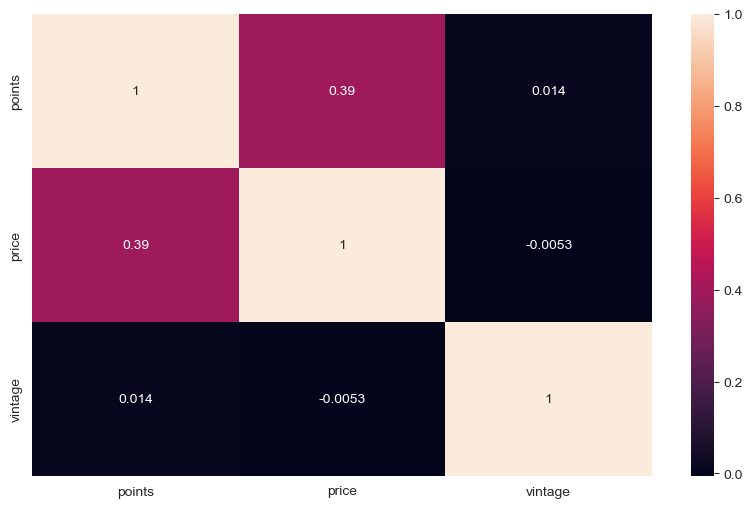

In [62]:
##heatmap of correlation
plt.figure(figsize = (10, 6))
sns.heatmap(df.corr(), annot = True)

plt.show()

In [63]:
##boxplots for the NUMERICAL data
def boxplot(df):
    ''' assign col where dtypes is numerical to the var col to call later'''
    columns = df.select_dtypes(include=np.number).columns

    '''create an overall fig size which we will add the other plots'''
    figure = plt.figure(figsize=(20, 10))
    plt.title("Numerical Data Boxplots", fontsize = 22)

    '''create subplots within the plot made, it will be a 1 x 3 tempate, bcs our df has 3x nmerical cols,
        but aanotherdf would have different amounts if diff numerical data, thats what the len(col) does,
        the final 1 denoates that this is taking up the first subfigure'''
    figure.add_subplot(1, len(columns), 1)

    '''create a loop that will go through each numeirical col and create new boxplot,
        depending on the index value of the col name, and it will do so by adding it ,
        to the +1 of the final subplot paramtere so the new graphs dont superimpose/ ,
        override. all data is plotted against numeric on y'''
    for index, col in enumerate(columns):
        if index > 0:
            figure.add_subplot(1, len(columns), index + 1)
        sns.boxplot(y=col, data=df)
        plt.ylabel(col, fontsize=15)
    figure.tight_layout()
    plt.show()
    return

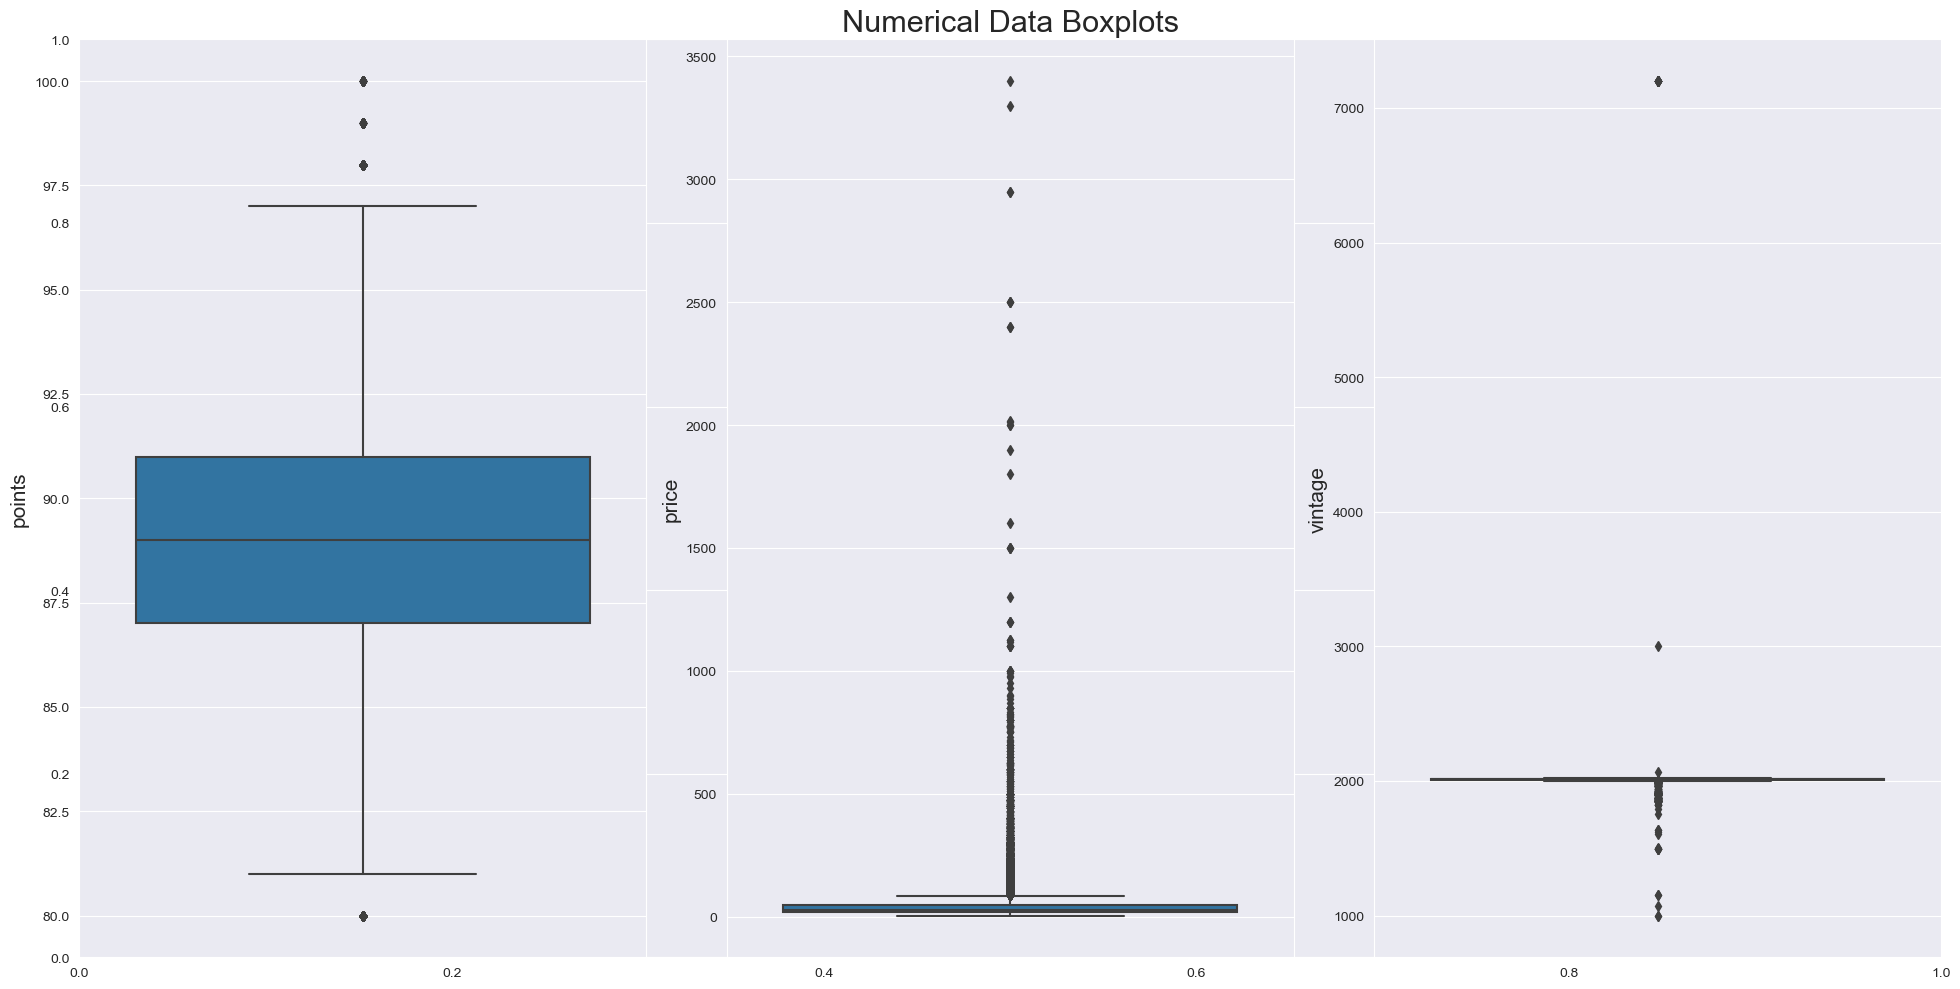

In [64]:
boxplot_ONE = boxplot(df) #boxplot prior to looking at outliers

In [65]:
'''the above boxplots show outliers in both price and vintage, lets deal with this'''
df = df[df['price'] < 1000]
df = df[df['vintage'] < 2022]

df.shape
#FINAL SHAPE OF DF AFTER REMOVING OUTLIERS

(191703, 9)

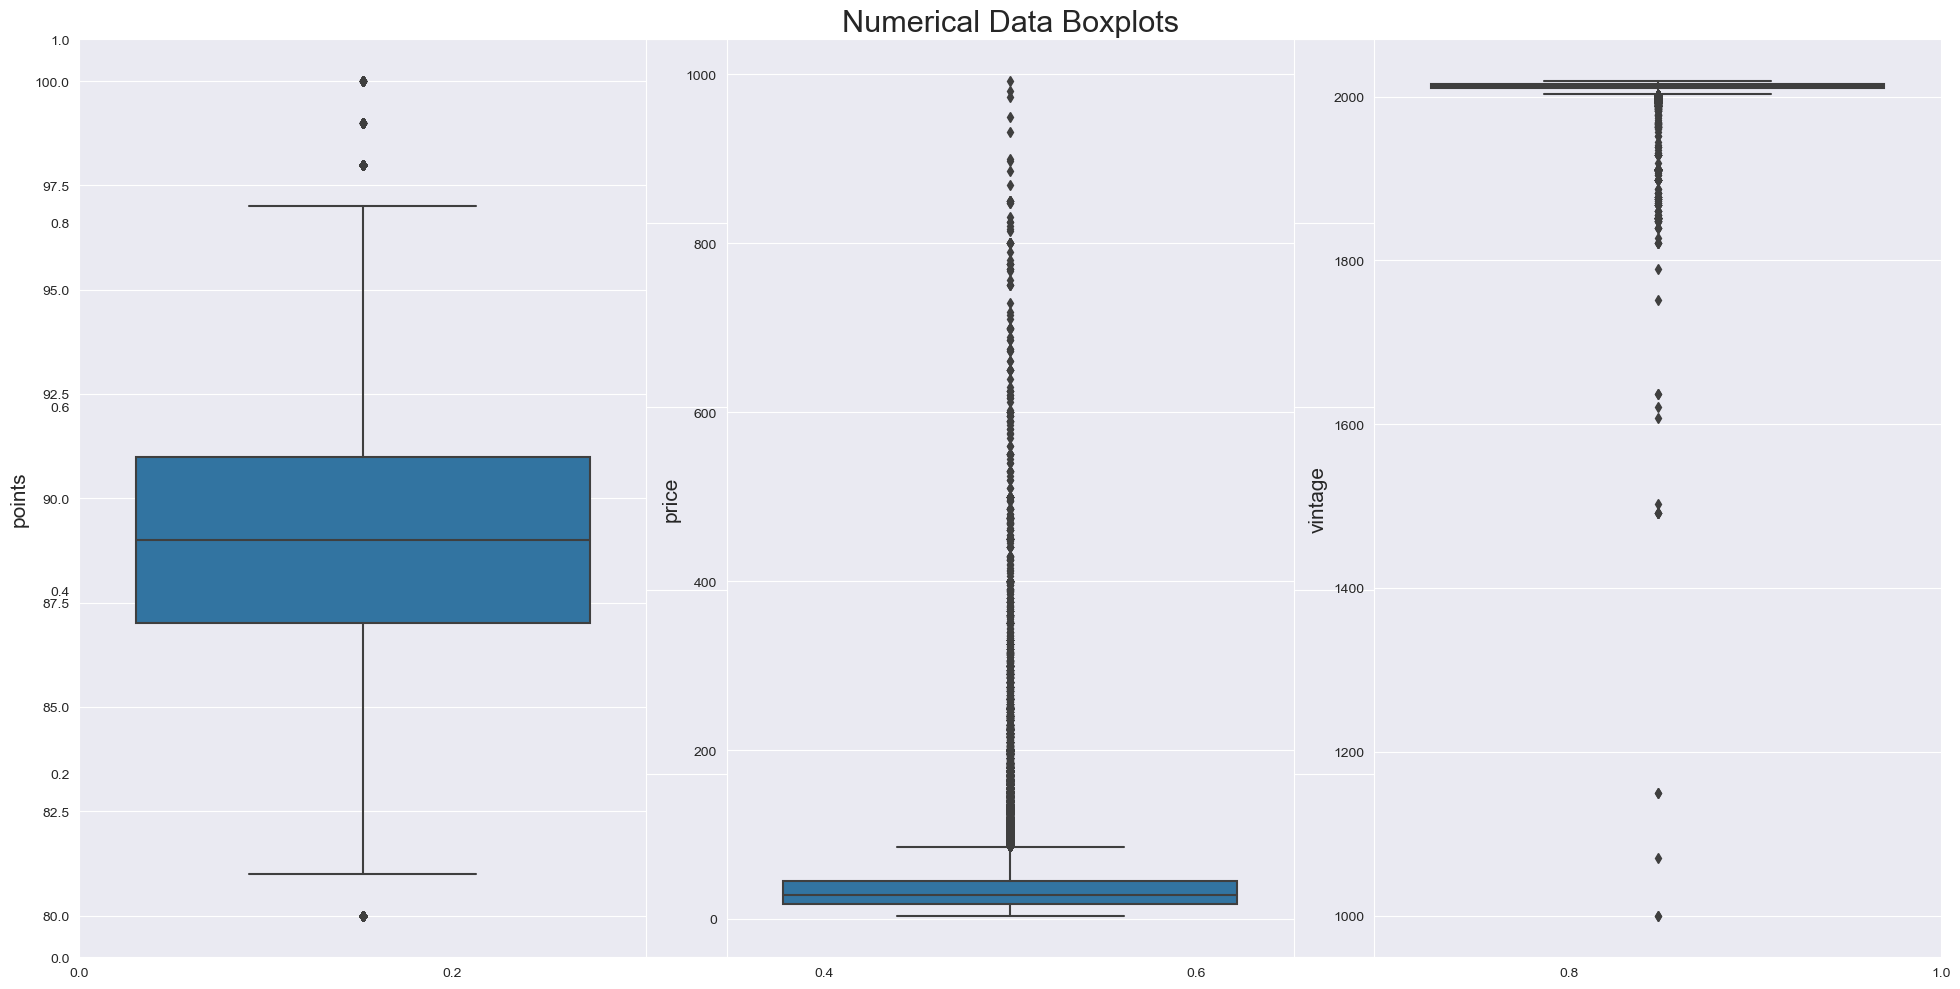

In [66]:
##lets rerun the boxplot code see if theres any improvements following the removal of outliers
boxplot_TWO = boxplot(df)

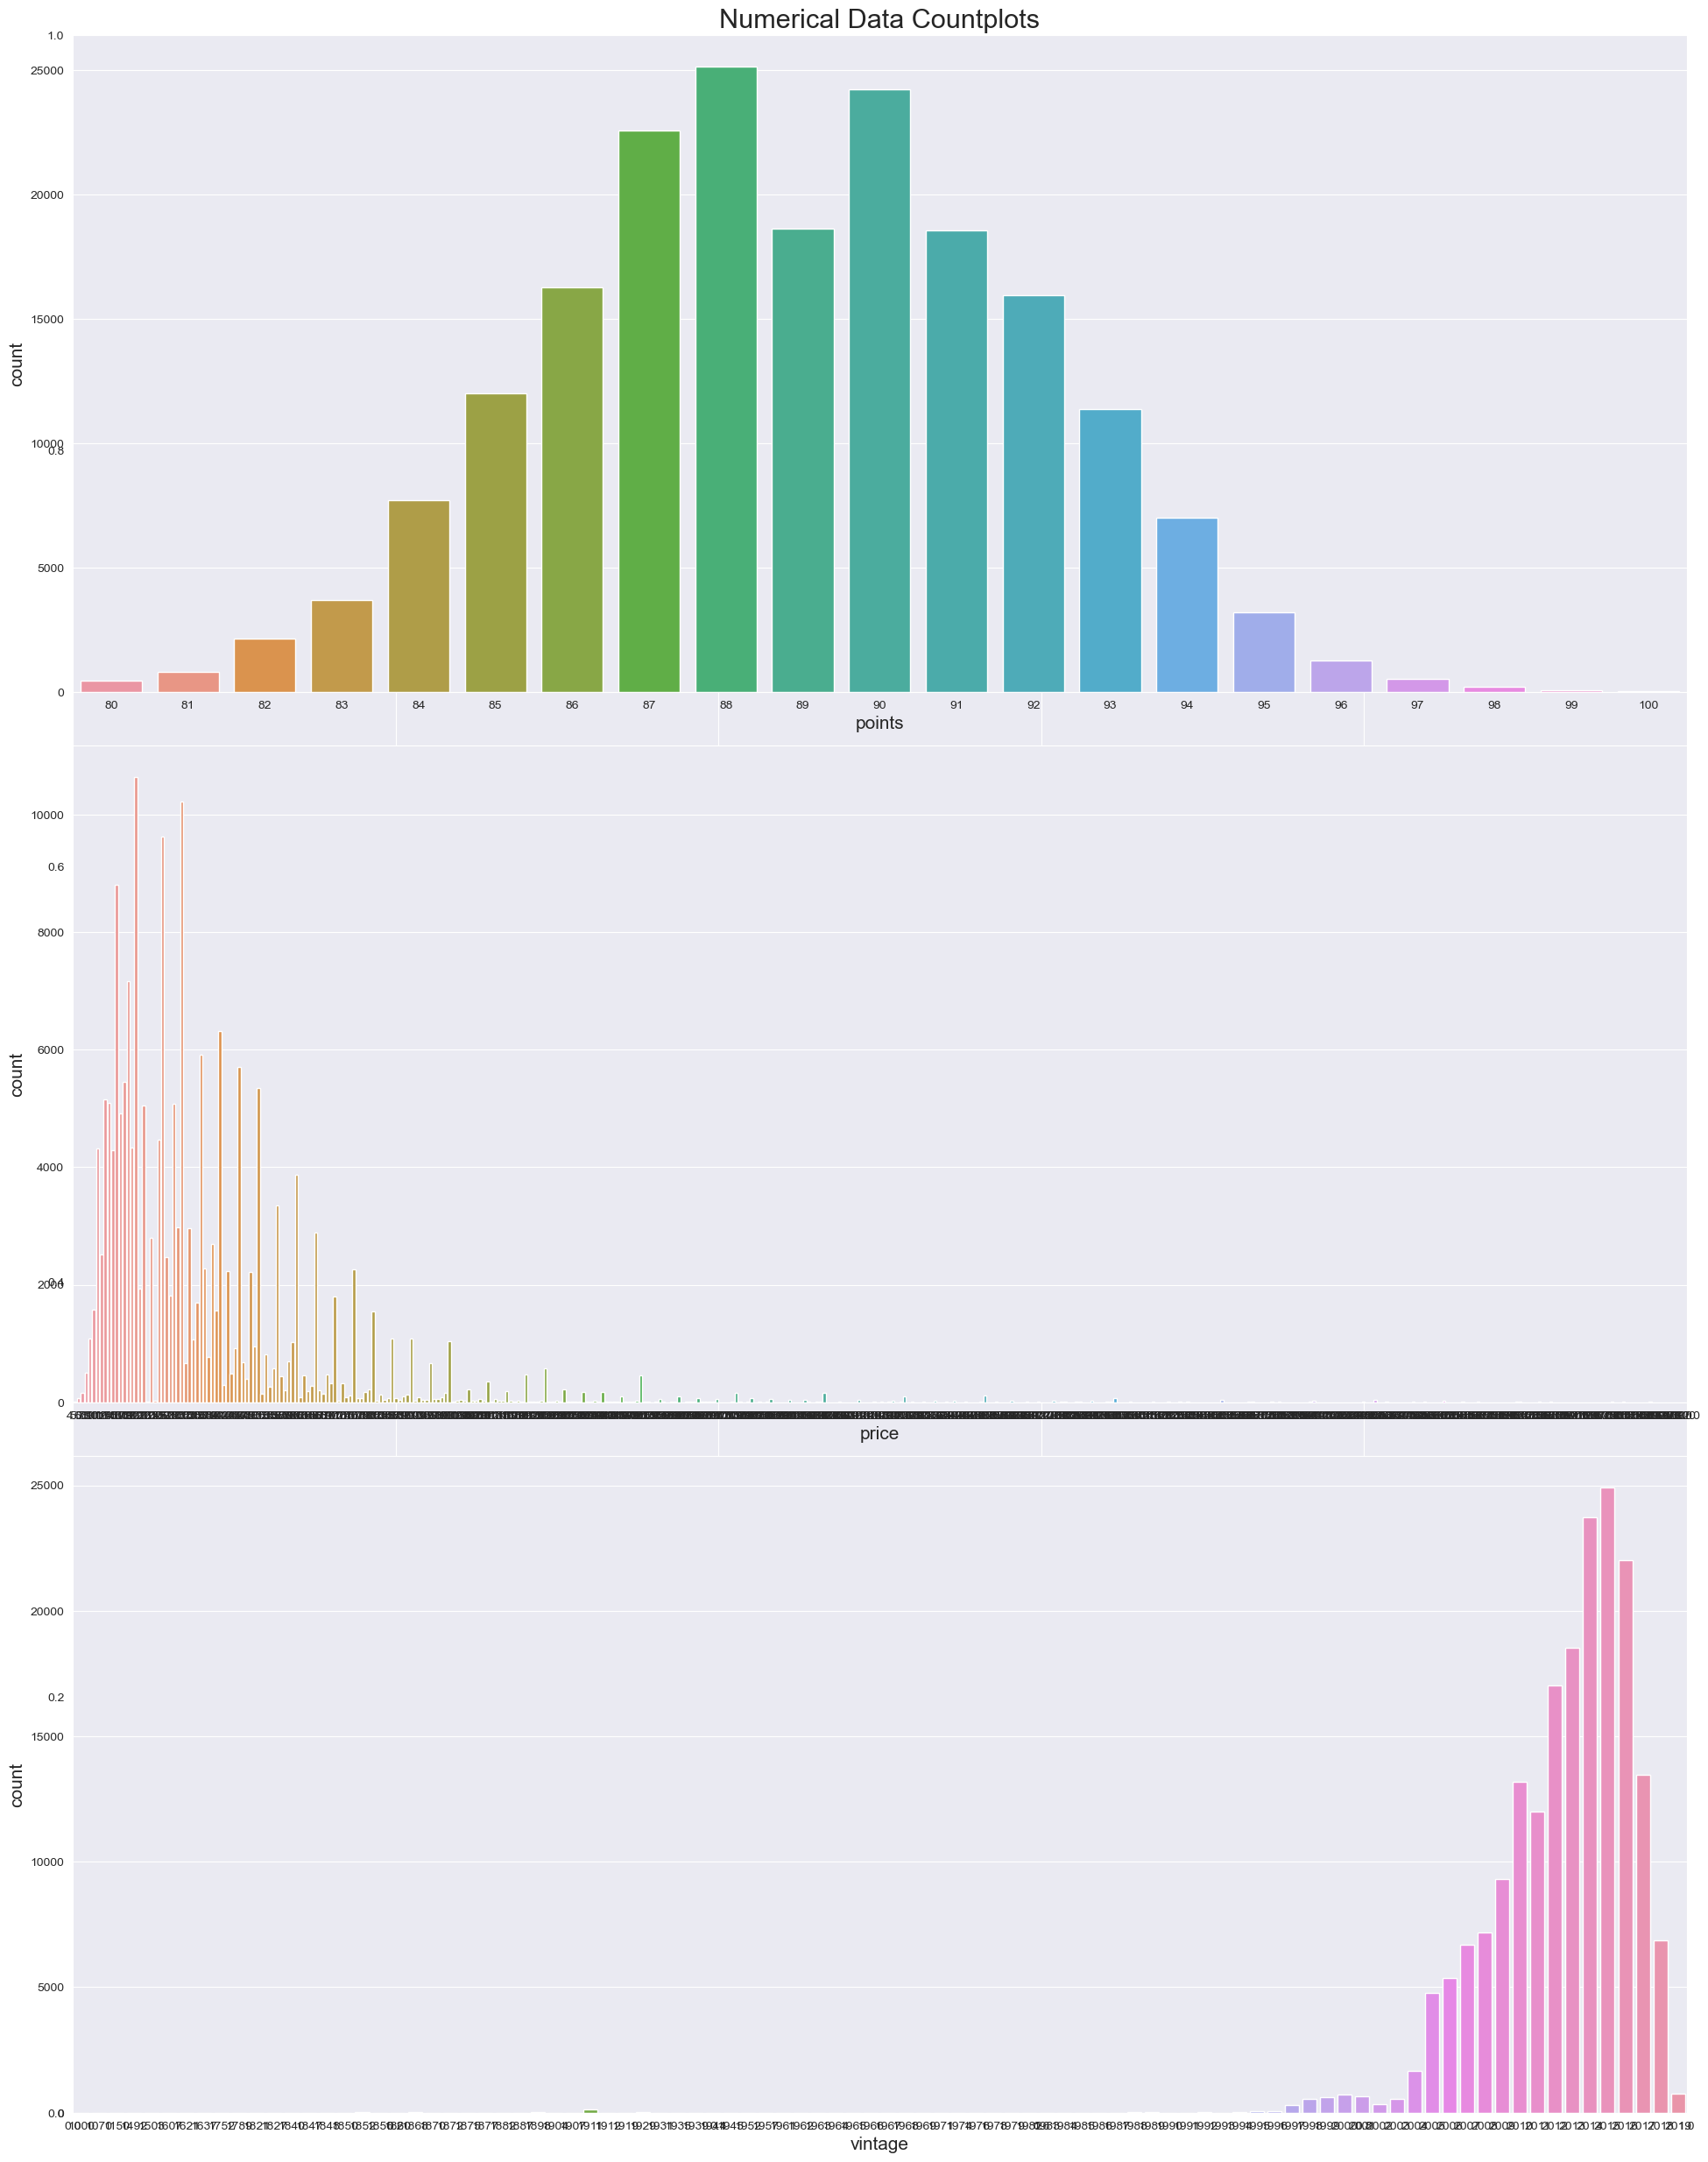

In [67]:
'''COUNTPLOTS FOR NUMERICAL DATA'''

#only select numerical cols
columns = df.select_dtypes(include=np.number).columns

#set fig size
figure = plt.figure(figsize=(20, 25))
#set fig title
plt.title("Numerical Data Countplots", fontsize = 22)

#create parameters for subplots
figure.add_subplot(len(columns), 1, 1)

#for each of the subplot parameters, use a differing numerical columns name and create a countplot, them display it and move onto the next column
for index, col in enumerate(columns):
    if index > 0:
        figure.add_subplot(len(columns),1,  index + 1)
    sns.countplot(x=col, data=df)
    plt.xlabel(col, fontsize=15)
    plt.ylabel("count", fontsize=15)

#plot the figure
figure.tight_layout()
plt.show()

#save it for use in the powerpoint potentially
# plt.savefig(r'C:\Users\odcro\Documents\Digital Futures\CAPSTONE\bars.png', format='png')

<Figure size 2000x800 with 0 Axes>

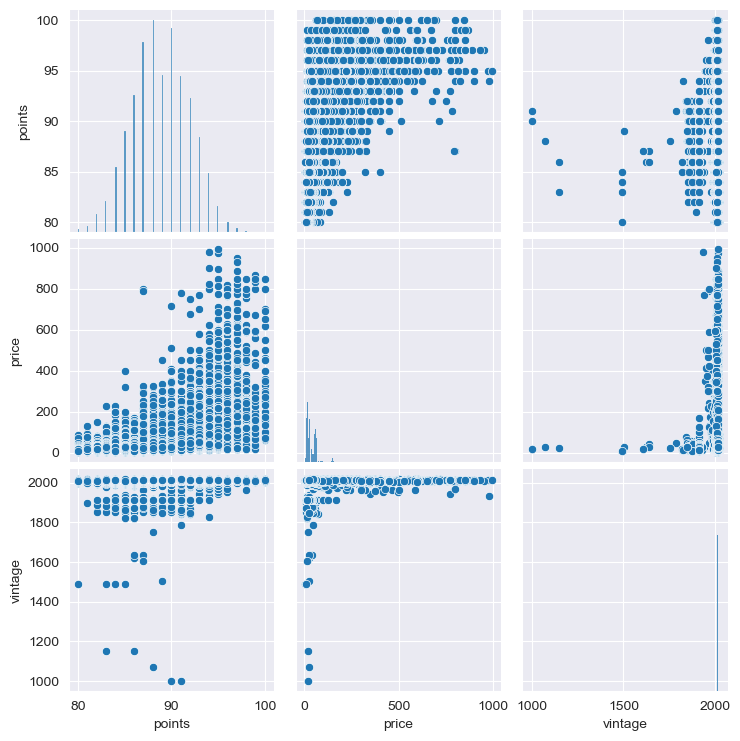

In [68]:
##pairplot of numerical data columns
plt.figure(figsize=(20,8))

sns.pairplot(df)

plt.show()

### Categorical Data EDA

In [69]:
##inc. caterogical vars in the .desc
df.describe(include='object')

,country,description,province,title,variety,winery
count,191703,191703,191703,191703,191703,191703
unique,45,191652,442,171369,113,20213
top,US,"Green bell pepper, red currant and dark spice ...",California,Gloria Ferrer NV Sonoma Brut Sparkling (Sonoma...,Pinot Noir,Wines & Winemakers
freq,80828,2,54122,12,21316,309


In [70]:
#the most vital categorical data columns is that of the reviews, this is what we will be doing NLP on, so lets explore them abit
df['description'].head(500)

0      Much like the regular bottling from 2012, this...
1      A sleek mix of tart berry, stem and herb, alon...
2      Oak and earth intermingle around robust aromas...
3      As with many of the Erath 2010 vineyard design...
4      A stiff, tannic wine, this slowly opens and br...
                             ...                        
495    This Pinot Noir is rich and elegant, but somew...
496    The color belies the deep cherry fruit at the ...
497    Shows jammy but somewhat simple cherry candy a...
498    The first of Morgan's 2010 Pinots to be releas...
499    Edgy and sharp now, with a cut of acidity givi...
Name: description, Length: 500, dtype: object

<AxesSubplot:>

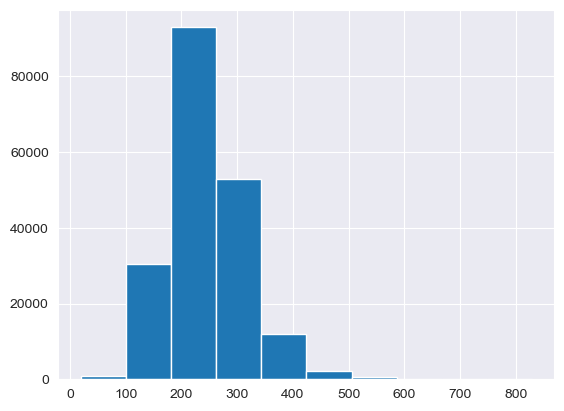

In [71]:
#take a look at dist of the number of characters present in each sentence

df['description'].str.len().hist()

<AxesSubplot:>

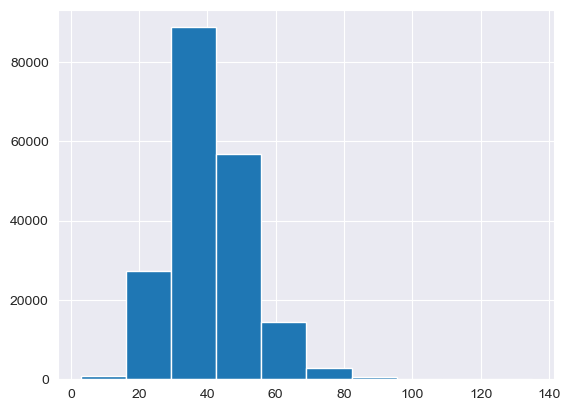

In [72]:
#take a look at dist of the number of words appearing in each wine review.

df['description'].str.split().map(lambda x: len(x)).hist()

<AxesSubplot:>

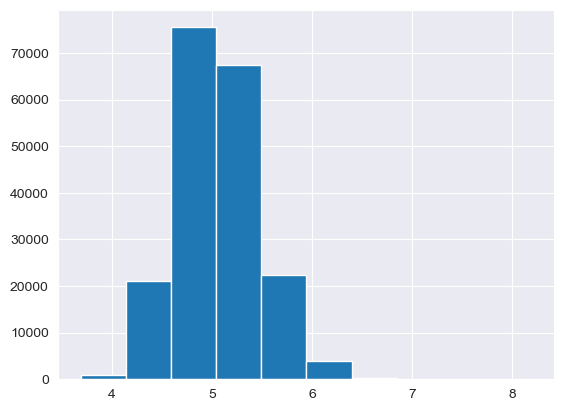

In [73]:
#Up next, let’s check the average word length in each sentence.
df['description'].str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x)).hist()

In [74]:
# This regex clean function allows us to look for different regex string matching patterns within the data

def regex_clean(txt, regex, replace):
    """Replace any text matching the regex

    Parameters
    ----------
    txt : string
        A text string that you want to parse and remove matches
    regex : string
        A text string of the regex pattern you want to match
    relace : string
        A text string of the pattern we want to replace

    Returns
    -------
    The same txt string with the matches removes
    """

    return " ".join(re.sub(regex, replace, txt).split())

In [75]:
#This applies all of our regex cleaning to the data and the tokenisation & lemminisation of the words

def prep_data(data):
    ## Part 1 - lower case
    data = data.lower()

    ## Part 2 - Regex
    ##now need to convert digit to NUMBER so don't remove things where its one number
    data = regex_clean(data, r'([\w]*|[^\w]*)\d+([\w]*|[^\w]*)','')

    #remove of awkward punctuation
    data = regex_clean(data, r'[!"#$%&()*+, -./:;<=>?@[\]^_`{|}~”“\']+', " ")

    ## Part 3 - Tokenize the words
    data = wordpunct_tokenize(data)

    ## Part 4 - Clean tokens
    punc = '!"#$%&()*+, -./:;<=>?@[\]^_`{|}~”“\''
    unwanted = ['wine', 'drink', 'ready', 'need', 'time', 'alongside', 'delivers', 'straightforward', 'flavour', 'flavor']
    stpwrd = nltk.corpus.stopwords.words('english')
    stpwrd.extend(punc)
    stpwrd.extend(unwanted)

    ## Remove stopwords and Punctuation
    data = [word for word in data if word not in stpwrd]

    ## convert word numbers to digits
    data_clean = []
    for word in data:
        try:
            word = str(w2n.word_to_num(word))
        except:
            word = word
        data_clean.append(word)

    ## Introduce the lemmatize method and lemmatize words
    lemmatizer = WordNetLemmatizer()
    data_clean = [lemmatizer.lemmatize(word) for word in data_clean]
    ## Only keep meaningful words
    data_clean = [word for word in data_clean if len(word)>2]
    ## remove stopwords one last time :)
    data_clean = [word for word in data_clean if word not in stpwrd]
    #Return cleaned tokenised and lemmatized list of words

    return data_clean

In [76]:
##apply the NLP processing to the revew data column
df['nlp'] = df['description'].apply(prep_data)
df.head(500)

,country,description,points,price,province,title,variety,winery,vintage,nlp
0,US,"Much like the regular bottling from 2012, this...",87,65.0,Oregon,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,2012,"[much, like, regular, bottling, come, across, ..."
1,US,"A sleek mix of tart berry, stem and herb, alon...",87,20.0,Oregon,Acrobat 2013 Pinot Noir (Oregon),Pinot Noir,Acrobat,2013,"[sleek, mix, tart, berry, stem, herb, along, h..."
2,US,Oak and earth intermingle around robust aromas...,87,69.0,California,Castello di Amorosa 2011 King Ridge Vineyard P...,Pinot Noir,Castello di Amorosa,2011,"[oak, earth, intermingle, around, robust, arom..."
3,US,As with many of the Erath 2010 vineyard design...,86,50.0,Oregon,Erath 2010 Hyland Pinot Noir (McMinnville),Pinot Noir,Erath,2010,"[many, erath, vineyard, designates, strongly, ..."
4,US,"A stiff, tannic wine, this slowly opens and br...",86,22.0,Oregon,Hawkins Cellars 2009 Pinot Noir (Willamette Va...,Pinot Noir,Hawkins Cellars,2009,"[stiff, tannic, slowly, open, brings, brambly,..."
...,...,...,...,...,...,...,...,...,...,...
495,US,"This Pinot Noir is rich and elegant, but somew...",88,35.0,California,Truchard 2011 Pinot Noir (Carneros),Pinot Noir,Truchard,2011,"[pinot, noir, rich, elegant, somewhat, raspber..."
496,Austria,The color belies the deep cherry fruit at the ...,87,45.0,Vienna,Weingut Mayer am Pfarrplatz 2011 Nussberg Pino...,Pinot Noir,Weingut Mayer am Pfarrplatz,2011,"[color, belies, deep, cherry, fruit, core, lit..."
497,US,Shows jammy but somewhat simple cherry candy a...,88,42.0,California,J. Wilkes 2007 Solomon Hills Vineyard Pinot No...,Pinot Noir,J. Wilkes,2007,"[show, jammy, somewhat, simple, cherry, candy,..."
498,US,The first of Morgan's 2010 Pinots to be releas...,87,32.0,California,Morgan 2010 Twelve Clones Pinot Noir (Santa Lu...,Pinot Noir,Morgan,2010,"[first, morgan, pinot, released, show, promise..."


In [77]:
#lets look more in depth at the processed data column
df['nlp'].head(500)

0      [much, like, regular, bottling, come, across, ...
1      [sleek, mix, tart, berry, stem, herb, along, h...
2      [oak, earth, intermingle, around, robust, arom...
3      [many, erath, vineyard, designates, strongly, ...
4      [stiff, tannic, slowly, open, brings, brambly,...
                             ...                        
495    [pinot, noir, rich, elegant, somewhat, raspber...
496    [color, belies, deep, cherry, fruit, core, lit...
497    [show, jammy, somewhat, simple, cherry, candy,...
498    [first, morgan, pinot, released, show, promise...
499    [edgy, sharp, cut, acidity, giving, rustic, bi...
Name: nlp, Length: 500, dtype: object

In [78]:
##create a list of the words in the corpus
list_of_taste = [desc for row in df["nlp"] for desc in row if desc != ""]

In [79]:
#lets just see the most common words in corpus using a counter
taste_list = [i[0] for i in Counter(list_of_taste).most_common(50)]
taste_list

['fruit',
 'palate',
 'aroma',
 'finish',
 'tannin',
 'acidity',
 'cherry',
 'black',
 'ripe',
 'note',
 'red',
 'spice',
 'nose',
 'berry',
 'oak',
 'full',
 'plum',
 'rich',
 'fresh',
 'dry',
 'apple',
 'show',
 'well',
 'offer',
 'blackberry',
 'texture',
 'light',
 'bodied',
 'white',
 'blend',
 'dark',
 'soft',
 'hint',
 'crisp',
 'herb',
 'bright',
 'lemon',
 'juicy',
 'citrus',
 'raspberry',
 'sweet',
 'pepper',
 'vanilla',
 'touch',
 'cabernet',
 'firm',
 'green',
 'fruity',
 'dried',
 'balanced']

<AxesSubplot:>

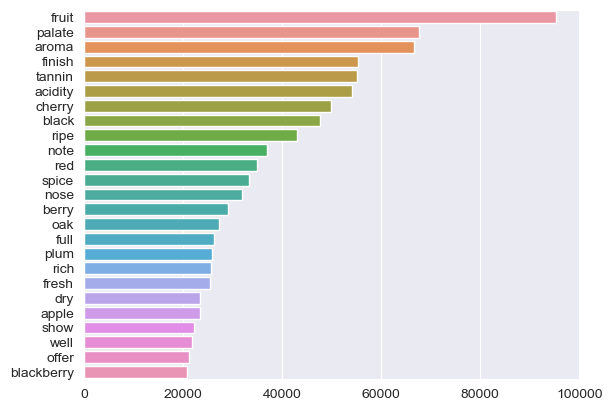

In [80]:
'''a plot showing the top 25 words in the corpus'''

##using the counter values and the list of words
x,y= [],[]
counter=Counter(list_of_taste)
most=counter.most_common()
for word,count in most[:25]:
        x.append(word)
        y.append(count)

sns.barplot(x=y,y=x)

#save it for the presentation
# plt.savefig(r'C:\Users\odcro\Documents\Digital Futures\CAPSTONE\wordds.png', format='png')

### ngram exploration

In [81]:
#This creates a new column in the dataframe which will include all the bigrams that can be constructed from the answer tokens

df['bigrams'] = df['nlp'].apply(lambda row: list(nltk.ngrams(row, 2)))

#Making a bigrams counter to check frequency
bigrams_counter = Counter()
df['bigrams'].apply(bigrams_counter.update)

## turning it into a dictionary
bigrams_taste = dict(bigrams_counter)

## loop through the items
bigrams_dictionary = {}

for k,v in bigrams_taste.items():
    if v > 3000:
        bigrams_dictionary[k] = v

# sorting the values in the dictionary

sorted_bigrams = sorted(bigrams_dictionary.items(), key=lambda x:x[1],reverse=True)
sorted_dict_bigrams = dict(sorted_bigrams)

In [82]:
#have a looksy
sorted_dict_bigrams

{('black', 'cherry'): 13918,
 ('full', 'bodied'): 12148,
 ('black', 'fruit'): 9771,
 ('cabernet', 'sauvignon'): 7674,
 ('red', 'fruit'): 7501,
 ('palate', 'offer'): 7269,
 ('black', 'currant'): 6234,
 ('medium', 'bodied'): 5911,
 ('red', 'berry'): 5473,
 ('berry', 'fruit'): 5402,
 ('red', 'cherry'): 5198,
 ('baking', 'spice'): 4952,
 ('black', 'plum'): 4950,
 ('nose', 'palate'): 4571,
 ('white', 'pepper'): 4370,
 ('black', 'pepper'): 4290,
 ('pinot', 'noir'): 4191,
 ('stone', 'fruit'): 4114,
 ('firm', 'tannin'): 3871,
 ('cabernet', 'franc'): 3818,
 ('bright', 'acidity'): 3690,
 ('nose', 'bottling'): 3688,
 ('green', 'apple'): 3588,
 ('grained', 'tannin'): 3523,
 ('ripe', 'fruit'): 3363,
 ('cherry', 'fruit'): 3345,
 ('fresh', 'acidity'): 3304,
 ('dried', 'herb'): 3264,
 ('red', 'currant'): 3227,
 ('tropical', 'fruit'): 3101}

In [83]:
#This creates a new column in the dataframe which will include all the trigrams that can be constructed from the answer tokens
df['trigrams'] = df['nlp'].apply(lambda row: list(nltk.ngrams(row, 3)))

#Making a trigrams counter to check frequency
trigrams_counter = Counter()
df['trigrams'].apply(trigrams_counter.update)

## turning it into a dictionary
trigrams_taste = dict(trigrams_counter)

## loop through the items
trigrams_dictionary = {}

for k,v in trigrams_taste.items():
    if v > 300:
        trigrams_dictionary[k] = v

# sorting the values in the dictionary
sorted_trigrams = sorted(trigrams_dictionary.items(), key=lambda x:x[1],reverse=True)
sorted_dict_trigrams = dict(sorted_trigrams)

In [84]:
#lets have a looksy,, again
sorted_dict_trigrams

{('fine', 'grained', 'tannin'): 2529,
 ('blend', 'cabernet', 'sauvignon'): 1706,
 ('cabernet', 'sauvignon', 'merlot'): 1557,
 ('new', 'french', 'oak'): 1338,
 ('red', 'berry', 'fruit'): 1319,
 ('black', 'currant', 'fruit'): 1158,
 ('dried', 'black', 'cherry'): 1146,
 ('medium', 'bodied', 'palate'): 1080,
 ('show', 'nose', 'bottling'): 1048,
 ('ripe', 'black', 'cherry'): 1026,
 ('full', 'bodied', 'palate'): 977,
 ('merlot', 'cabernet', 'sauvignon'): 971,
 ('black', 'cherry', 'fruit'): 952,
 ('palate', 'offer', 'dried'): 920,
 ('merlot', 'cabernet', 'franc'): 919,
 ('ripe', 'black', 'fruit'): 879,
 ('close', 'grained', 'tannin'): 832,
 ('tannin', 'fresh', 'acidity'): 754,
 ('cabernet', 'sauvignon', 'cabernet'): 742,
 ('sauvignon', 'cabernet', 'franc'): 739,
 ('aroma', 'lead', 'nose'): 736,
 ('blackberry', 'black', 'cherry'): 690,
 ('white', 'stone', 'fruit'): 688,
 ('tannin', 'bright', 'acidity'): 656,
 ('roasted', 'coffee', 'bean'): 645,
 ('blend', 'grenache', 'syrah'): 637,
 ('black', 

### word clouds

In [85]:
## lets count the top 50 tokens in the corpus
token_counts = Counter(list_of_taste).most_common(50)

In [86]:
#make this into a dict of terms and counts, and display this
token_counts_dict = dict(token_counts)
token_counts_dict

{'fruit': 95331,
 'palate': 67682,
 'aroma': 66565,
 'finish': 55394,
 'tannin': 55105,
 'acidity': 54050,
 'cherry': 49784,
 'black': 47614,
 'ripe': 43104,
 'note': 36967,
 'red': 34870,
 'spice': 33285,
 'nose': 31870,
 'berry': 29010,
 'oak': 27261,
 'full': 26308,
 'plum': 25805,
 'rich': 25570,
 'fresh': 25553,
 'dry': 23512,
 'apple': 23410,
 'show': 22294,
 'well': 21819,
 'offer': 21231,
 'blackberry': 20773,
 'texture': 20497,
 'light': 20433,
 'bodied': 20419,
 'white': 20305,
 'blend': 20165,
 'dark': 18632,
 'soft': 18387,
 'hint': 17897,
 'crisp': 17729,
 'herb': 17461,
 'bright': 17184,
 'lemon': 16992,
 'juicy': 16802,
 'citrus': 16774,
 'raspberry': 15783,
 'sweet': 15586,
 'pepper': 15418,
 'vanilla': 15405,
 'touch': 15349,
 'cabernet': 14965,
 'firm': 14395,
 'green': 14195,
 'fruity': 14163,
 'dried': 13933,
 'balanced': 13714}

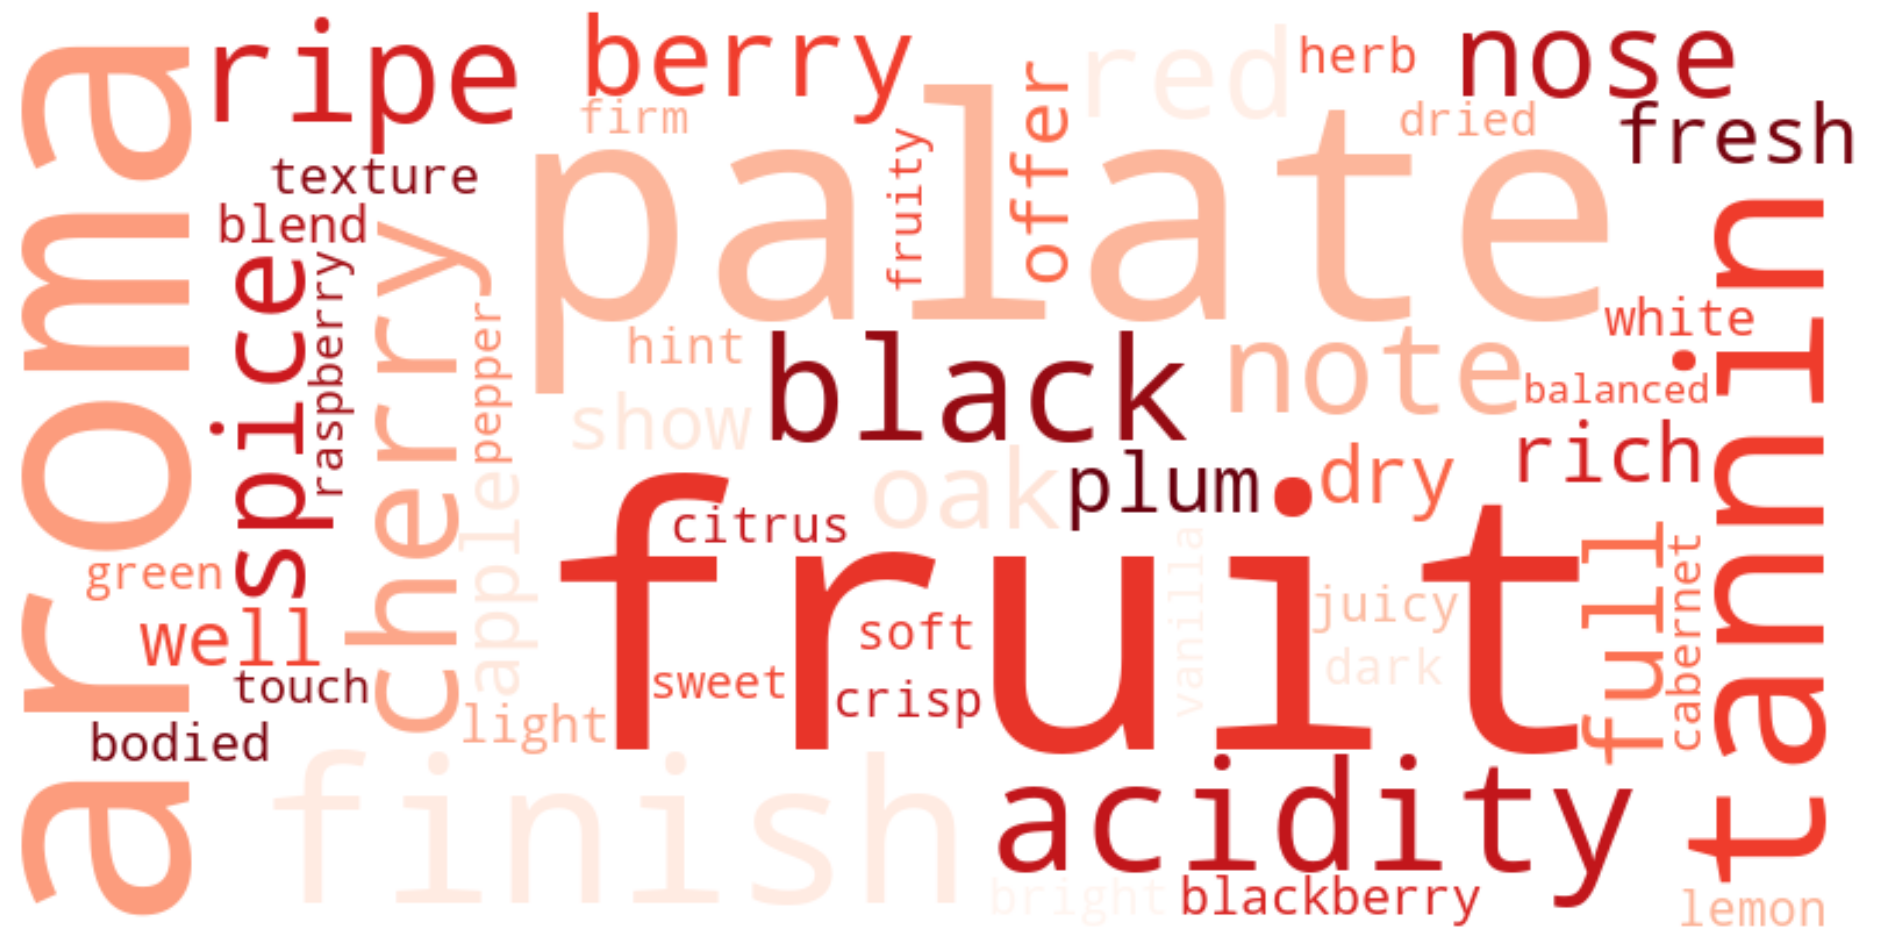

In [87]:
##CREATE a cute word cloud

wc = WordCloud(width=800, height=400, max_words=50, background_color="white", colormap='Reds').generate_from_frequencies(token_counts_dict)
plt.figure(figsize=(24,20))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

# Save the image in the for presentation
wc.to_file(r"C:\Users\odcro\Documents\Digital Futures\CAPSTONE\wc_1.png")

In [88]:
##join the previously created bigrams by a hypen so they can be recognised as one term
hyphenated_bigrams = ['_'.join(tup) for tup in sorted_dict_bigrams]
print (hyphenated_bigrams)

['black_cherry', 'full_bodied', 'black_fruit', 'cabernet_sauvignon', 'red_fruit', 'palate_offer', 'black_currant', 'medium_bodied', 'red_berry', 'berry_fruit', 'red_cherry', 'baking_spice', 'black_plum', 'nose_palate', 'white_pepper', 'black_pepper', 'pinot_noir', 'stone_fruit', 'firm_tannin', 'cabernet_franc', 'bright_acidity', 'nose_bottling', 'green_apple', 'grained_tannin', 'ripe_fruit', 'cherry_fruit', 'fresh_acidity', 'dried_herb', 'red_currant', 'tropical_fruit']


In [89]:
#count the top 50 and make this a dictionary to feed it though the wordcloud
token_counts2 = Counter(hyphenated_bigrams).most_common(50)
token_counts2_dict = dict(token_counts2)
token_counts2_dict

{'black_cherry': 1,
 'full_bodied': 1,
 'black_fruit': 1,
 'cabernet_sauvignon': 1,
 'red_fruit': 1,
 'palate_offer': 1,
 'black_currant': 1,
 'medium_bodied': 1,
 'red_berry': 1,
 'berry_fruit': 1,
 'red_cherry': 1,
 'baking_spice': 1,
 'black_plum': 1,
 'nose_palate': 1,
 'white_pepper': 1,
 'black_pepper': 1,
 'pinot_noir': 1,
 'stone_fruit': 1,
 'firm_tannin': 1,
 'cabernet_franc': 1,
 'bright_acidity': 1,
 'nose_bottling': 1,
 'green_apple': 1,
 'grained_tannin': 1,
 'ripe_fruit': 1,
 'cherry_fruit': 1,
 'fresh_acidity': 1,
 'dried_herb': 1,
 'red_currant': 1,
 'tropical_fruit': 1}

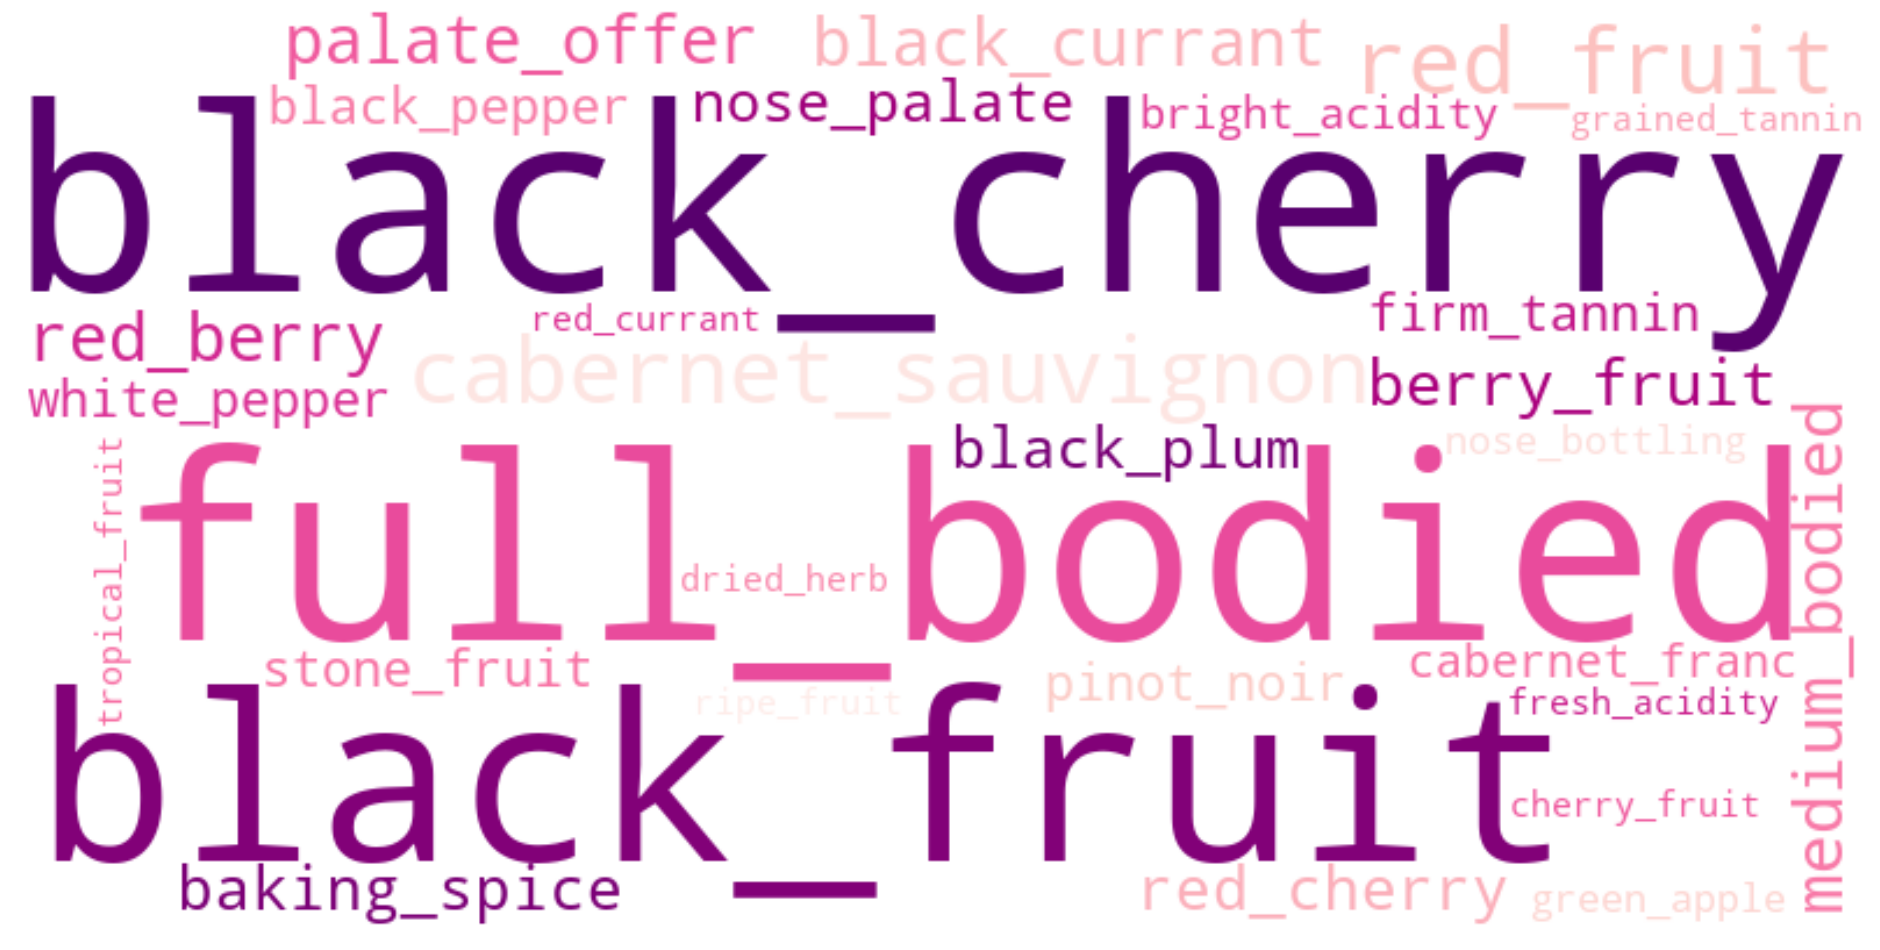

In [90]:
##CREATE a cute word cloud

wc = WordCloud(width=800, height=400, max_words=50, background_color="white", colormap='RdPu').generate_from_frequencies(token_counts2_dict)
plt.figure(figsize=(24,20))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

# Save the image for pres
wc.to_file(r"C:\Users\odcro\Documents\Digital Futures\CAPSTONE\wc_2.png")

In [91]:
## repeat, using a hypen for the trigrams this time
hyphenated_trigrams = ['_'.join(tup) for tup in sorted_dict_trigrams]
print(hyphenated_trigrams)

['fine_grained_tannin', 'blend_cabernet_sauvignon', 'cabernet_sauvignon_merlot', 'new_french_oak', 'red_berry_fruit', 'black_currant_fruit', 'dried_black_cherry', 'medium_bodied_palate', 'show_nose_bottling', 'ripe_black_cherry', 'full_bodied_palate', 'merlot_cabernet_sauvignon', 'black_cherry_fruit', 'palate_offer_dried', 'merlot_cabernet_franc', 'ripe_black_fruit', 'close_grained_tannin', 'tannin_fresh_acidity', 'cabernet_sauvignon_cabernet', 'sauvignon_cabernet_franc', 'aroma_lead_nose', 'blackberry_black_cherry', 'white_stone_fruit', 'tannin_bright_acidity', 'roasted_coffee_bean', 'blend_grenache_syrah', 'black_cherry_blackberry', 'black_skinned_fruit', 'black_skinned_berry', 'black_fruit_aroma', 'blackberry_black_currant', 'black_cherry_plum', 'juicy_black_cherry', 'dark_skinned_berry', 'palate_offer_black', 'blend_merlot_cabernet', 'take_center_stage', 'franc_petit_verdot', 'offer_dried_black', 'nose_bottling_palate', 'cabernet_sauvignon_syrah', 'black_cherry_raspberry', 'aroma_b

In [92]:
##create a dict of the count and term of most common 50 trigrams
token_counts3 = Counter(hyphenated_trigrams).most_common(50)
token_counts3_dict = dict(token_counts3)
token_counts3_dict

{'fine_grained_tannin': 1,
 'blend_cabernet_sauvignon': 1,
 'cabernet_sauvignon_merlot': 1,
 'new_french_oak': 1,
 'red_berry_fruit': 1,
 'black_currant_fruit': 1,
 'dried_black_cherry': 1,
 'medium_bodied_palate': 1,
 'show_nose_bottling': 1,
 'ripe_black_cherry': 1,
 'full_bodied_palate': 1,
 'merlot_cabernet_sauvignon': 1,
 'black_cherry_fruit': 1,
 'palate_offer_dried': 1,
 'merlot_cabernet_franc': 1,
 'ripe_black_fruit': 1,
 'close_grained_tannin': 1,
 'tannin_fresh_acidity': 1,
 'cabernet_sauvignon_cabernet': 1,
 'sauvignon_cabernet_franc': 1,
 'aroma_lead_nose': 1,
 'blackberry_black_cherry': 1,
 'white_stone_fruit': 1,
 'tannin_bright_acidity': 1,
 'roasted_coffee_bean': 1,
 'blend_grenache_syrah': 1,
 'black_cherry_blackberry': 1,
 'black_skinned_fruit': 1,
 'black_skinned_berry': 1,
 'black_fruit_aroma': 1,
 'blackberry_black_currant': 1,
 'black_cherry_plum': 1,
 'juicy_black_cherry': 1,
 'dark_skinned_berry': 1,
 'palate_offer_black': 1,
 'blend_merlot_cabernet': 1,
 'take_

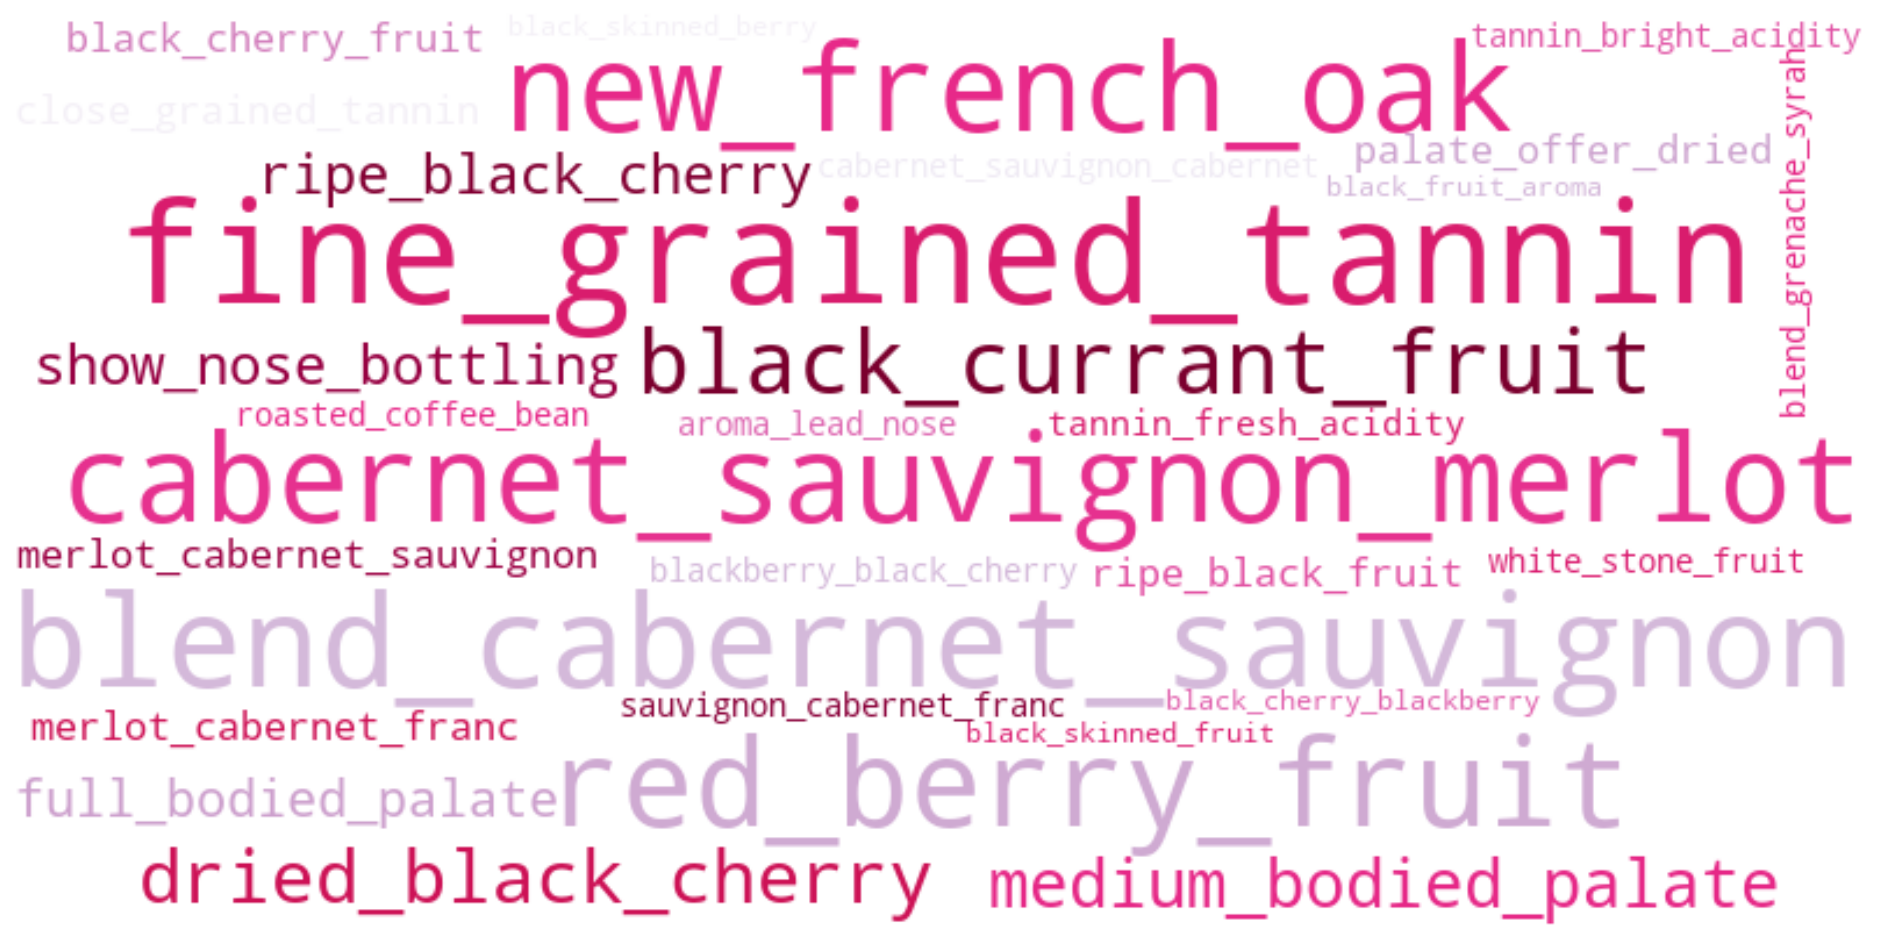

In [93]:
##CREATE a cute word cloud

wc = WordCloud(width=800, height=400, max_words=30, background_color="white",
               colormap='PuRd').generate_from_frequencies(token_counts3_dict)
plt.figure(figsize=(24, 20))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

# Save the image for presentation
wc.to_file(r"C:\Users\odcro\Documents\Digital Futures\CAPSTONE\wc_3.png")

### Vectorisation

In [94]:
##create a clean list of lists, this time having each review or 'document' in a list
list = [word for word in df['nlp']]
list

[['much',
  'like',
  'regular',
  'bottling',
  'come',
  'across',
  'rather',
  'rough',
  'tannic',
  'rustic',
  'earthy',
  'herbal',
  'characteristic',
  'nonetheless',
  'think',
  'pleasantly',
  'unfussy',
  'country',
  'good',
  'companion',
  'hearty',
  'winter',
  'stew'],
 ['sleek',
  'mix',
  'tart',
  'berry',
  'stem',
  'herb',
  'along',
  'hint',
  'oak',
  'chocolate',
  'fair',
  'value',
  'widely',
  'available',
  'oregon',
  'pinot',
  'oak',
  'aged',
  'six',
  'month',
  'whether',
  'neutral',
  'staved',
  'indicated'],
 ['oak',
  'earth',
  'intermingle',
  'around',
  'robust',
  'aroma',
  'wet',
  'forest',
  'floor',
  'vineyard',
  'designated',
  'pinot',
  'hail',
  'high',
  'elevation',
  'site',
  'small',
  'production',
  'offer',
  'intense',
  'full',
  'bodied',
  'raspberry',
  'blackberry',
  'steeped',
  'smoky',
  'spice',
  'smooth',
  'texture'],
 ['many',
  'erath',
  'vineyard',
  'designates',
  'strongly',
  'herbal',
  'note'

In [95]:
list[0:2] #show each term in review 1 -> 2

[['much',
  'like',
  'regular',
  'bottling',
  'come',
  'across',
  'rather',
  'rough',
  'tannic',
  'rustic',
  'earthy',
  'herbal',
  'characteristic',
  'nonetheless',
  'think',
  'pleasantly',
  'unfussy',
  'country',
  'good',
  'companion',
  'hearty',
  'winter',
  'stew'],
 ['sleek',
  'mix',
  'tart',
  'berry',
  'stem',
  'herb',
  'along',
  'hint',
  'oak',
  'chocolate',
  'fair',
  'value',
  'widely',
  'available',
  'oregon',
  'pinot',
  'oak',
  'aged',
  'six',
  'month',
  'whether',
  'neutral',
  'staved',
  'indicated']]

In [96]:
##we want to create a dictonary of all the words, this is known as a corpus
dictionary = gensim.corpora.Dictionary(list)

In [97]:
##create a bag of words from the predefined corpus
bow_corpus = [dictionary.doc2bow(doc) for doc in list]
bow_corpus

[[(0, 1),
  (1, 1),
  (2, 1),
  (3, 1),
  (4, 1),
  (5, 1),
  (6, 1),
  (7, 1),
  (8, 1),
  (9, 1),
  (10, 1),
  (11, 1),
  (12, 1),
  (13, 1),
  (14, 1),
  (15, 1),
  (16, 1),
  (17, 1),
  (18, 1),
  (19, 1),
  (20, 1),
  (21, 1),
  (22, 1)],
 [(23, 1),
  (24, 1),
  (25, 1),
  (26, 1),
  (27, 1),
  (28, 1),
  (29, 1),
  (30, 1),
  (31, 1),
  (32, 1),
  (33, 1),
  (34, 1),
  (35, 2),
  (36, 1),
  (37, 1),
  (38, 1),
  (39, 1),
  (40, 1),
  (41, 1),
  (42, 1),
  (43, 1),
  (44, 1),
  (45, 1)],
 [(35, 1),
  (37, 1),
  (46, 1),
  (47, 1),
  (48, 1),
  (49, 1),
  (50, 1),
  (51, 1),
  (52, 1),
  (53, 1),
  (54, 1),
  (55, 1),
  (56, 1),
  (57, 1),
  (58, 1),
  (59, 1),
  (60, 1),
  (61, 1),
  (62, 1),
  (63, 1),
  (64, 1),
  (65, 1),
  (66, 1),
  (67, 1),
  (68, 1),
  (69, 1),
  (70, 1),
  (71, 1),
  (72, 1)],
 [(9, 1),
  (29, 1),
  (71, 1),
  (73, 1),
  (74, 1),
  (75, 1),
  (76, 1),
  (77, 1),
  (78, 1),
  (79, 1),
  (80, 1),
  (81, 1),
  (82, 1),
  (83, 1),
  (84, 1),
  (85, 1),
  (86, 

In [98]:
'''
One of the main problems associated with the bag of words model is that it assigns equal value to the words, irrespective of their importance. For instance, the word "play" appears in all the three sentences, therefore this word is very common, on the other hand, the word "football" only appears in one sentence. The words that are rare have more classifying power compared to the words that are common.

The idea behind the TF-IDF approach is that the words that are more common in one sentence and less common in other sentences should be given high weights.'''


'''TF-IDF is an abbreviation for Term Frequency Inverse Document Frequency. This is very common algorithm to transform text into a meaningful representation of numbers which is used to fit machine algorithm for prediction.

we need to do this before we can run knn on the data

Count Vectorizer give number of frequency with respect to index of vocabulary where as tf-idf consider overall documents of weight of words.

TfidfVectorizer converts a collection of raw documents to a matrix of TF-IDF features. Each document is represented as a set of words, and the number of times each word appears in the collection is used to compute its TF-IDF feature.

TfidfVectorizer has turned our text data into numerical form so that it can be used by other ML algorithms'''


'TF-IDF is an abbreviation for Term Frequency Inverse Document Frequency. This is very common algorithm to transform text into a meaningful representation of numbers which is used to fit machine algorithm for prediction.\n\nwe need to do this before we can run knn on the data\n\nCount Vectorizer give number of frequency with respect to index of vocabulary where as tf-idf consider overall documents of weight of words.\n\nTfidfVectorizer converts a collection of raw documents to a matrix of TF-IDF features. Each document is represented as a set of words, and the number of times each word appears in the collection is used to compute its TF-IDF feature.\n\nTfidfVectorizer has turned our text data into numerical form so that it can be used by other ML algorithms'

In [99]:
#create an array containing each row of the wine review.
# seems like we did all the prior nlp on the column for no reason but we will pass this through the prep_data function later in the vectorisation process
desc = df['description'].values
desc

array(["Much like the regular bottling from 2012, this comes across as rather rough and tannic, with rustic, earthy, herbal characteristics. Nonetheless, if you think of it as a pleasantly unfussy country wine, it's a good companion to a hearty winter stew.",
       'A sleek mix of tart berry, stem and herb, along with a hint of oak and chocolate, this is a fair value in a widely available, drink-now Oregon Pinot. The wine oak-aged for six months, whether in neutral or re-staved is not indicated.',
       'Oak and earth intermingle around robust aromas of wet forest floor in this vineyard-designated Pinot that hails from a high-elevation site. Small in production, it offers intense, full-bodied raspberry and blackberry steeped in smoky spice and smooth texture.',
       ...,
       'This blends 70% Syrah and 30% Grenache from the estate site. The wine is bright and fresh on the nose, a whiff of peppery meat and earthy leather arriving first. The midplate takes on more ripe concentratio

In [100]:
# as we are extract features from a large text description, we'll use a custom tokenizer (prep_data funct)

# We then instantiate the vectoriser.


##refine this outside of the function to be applied here
punc = '!"#$%&()*+, -./:;<=>?@[\]^_`{|}~”“\''
unwanted = ['wine', 'drink', 'ready', 'need', 'time', 'alongside', 'delivers', 'straightforward']
stpwrd = nltk.corpus.stopwords.words('english')
stpwrd.extend(punc)
stpwrd.extend(unwanted)

##inital run of the vect, now using my own premade tokenization, its awful
vectorizer = TfidfVectorizer(stop_words = stpwrd)
X = vectorizer.fit_transform(desc)

word_features = vectorizer.get_feature_names()
word_features[0:100]

'''Both the count vectorizer and tf-idf vectorizer in sklearn have a method called get_feature_names(). This returns a list of all the tokens in the corpus that were vectorized for each document

We can override the default settings to the tf-idfvectorizer by writting our own function that performs the stemming and any other text processing you want to execute#

#After writing the function, I pass it through as an argument when instantiating the vectorizer. We can see that those repeated forms I mentioned above are now gone and only the root form is present thanks to the lemming we added'''

C:\Users\odcro\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


'Both the count vectorizer and tf-idf vectorizer in sklearn have a method called get_feature_names(). This returns a list of all the tokens in the corpus that were vectorized for each document\n\nWe can override the default settings to the tf-idfvectorizer by writting our own function that performs the stemming and any other text processing you want to execute#\n\n#After writing the function, I pass it through as an argument when instantiating the vectorizer. We can see that those repeated forms I mentioned above are now gone and only the root form is present thanks to the lemming we added'

In [101]:
#passing the wine reviews through the nlp processes prior but doing so for all the words in the corpus
modded_vectoriser = TfidfVectorizer(stop_words = stpwrd,tokenizer = prep_data)

#2nd run so x2
X2 = modded_vectoriser.fit_transform(desc)

modded_word_features = modded_vectoriser.get_feature_names()
modded_word_features[0:10]

['aacacia',
 'aand',
 'aarde',
 'aaron',
 'abacela',
 'abadal',
 'abadia',
 'abandon',
 'abandoned',
 'abate']

In [102]:
#final vect, need all the words included for good model

###OKAY LETS DO THE TOP x INSTANCES, easier to manage rn and prioritises the highest % important words, also my memory wont let me do the whole corpus haha
final_vectoriser = TfidfVectorizer(stop_words = stpwrd, tokenizer = prep_data, max_features = 250)

#final run so x3
#fit_transform() returns a tf-idf-weighted document-term matrix, this can be fed through the clustering models
X3 = final_vectoriser.fit_transform(desc)

#assign the words of the matrix
final_word_features = final_vectoriser.get_feature_names()

In [103]:
#print the
X3

<191703x250 sparse matrix of type '<class 'numpy.float64'>'
	with 2560148 stored elements in Compressed Sparse Row format>

In [104]:
#print the first 25 words
final_word_features[0:25]

['accent',
 'acid',
 'acidity',
 'add',
 'aftertaste',
 'age',
 'aged',
 'aging',
 'alcohol',
 'almond',
 'almost',
 'along',
 'also',
 'anise',
 'apple',
 'apricot',
 'aroma',
 'aromatic',
 'attractive',
 'baked',
 'baking',
 'balance',
 'balanced',
 'barrel',
 'berry']

In [105]:
# get idf values
print('\nidf values:')
for word, weight in zip(final_vectoriser.get_feature_names(), final_vectoriser.idf_):
    print(word, ':', weight)

##It is important to mention that the IDF value for a word remains the same throughout all the documents as it depends upon the total number of documents. On the other hand, TF values of a word differ from document to document.


idf values:
accent : 4.845209474248067
acid : 4.9024396441747555
acidity : 2.2894981448540834
add : 4.6107614336303495
aftertaste : 4.894975962634666
age : 4.11506316177652
aged : 4.703296617435152
aging : 4.194420394633999
alcohol : 4.889095848542851
almond : 4.772985267390116
almost : 4.55960323134687
along : 4.116827971929258
also : 4.057728438100964
anise : 4.6042216911459155
apple : 3.211620572380214
apricot : 4.601732460564273
aroma : 2.076149170097249
aromatic : 4.921477903380173
attractive : 4.540894121472483
baked : 4.613853821096619
baking : 4.637753097667594
balance : 4.000039830974652
balanced : 3.648533291506875
barrel : 4.311758123498457
berry : 2.9792984691827122
best : 4.593163427839173
big : 4.585795868301461
bit : 4.199267961213048
bitter : 4.696755819772914
black : 2.570152799183254
blackberry : 3.2674462873080157
blanc : 4.9317995511882255
blend : 3.2694628235832086
blueberry : 4.679657821929421
bodied : 3.2415457019514675
body : 4.61753849509965
bold : 4.804572907

In [106]:
# get indexing
print('\nWord indexes:')
print(final_vectoriser.vocabulary_)

# display tf-idf values
print('\ntf-idf value:')
print('\n(x, y) where x = docment index, or ROW.'
      '         \n and y = word index in said row)')
print(X3)

# in matrix form
print('\ntf-idf values in matrix form:')
print(X3.toarray())


Word indexes:
{'much': 148, 'like': 126, 'bottling': 38, 'come': 57, 'rather': 175, 'tannic': 213, 'earthy': 78, 'herbal': 110, 'good': 102, 'mix': 144, 'tart': 215, 'berry': 24, 'herb': 109, 'along': 11, 'hint': 112, 'oak': 153, 'chocolate': 48, 'pinot': 167, 'aged': 6, 'earth': 77, 'aroma': 16, 'vineyard': 233, 'high': 111, 'offer': 155, 'intense': 114, 'full': 98, 'bodied': 34, 'raspberry': 174, 'blackberry': 30, 'smoky': 195, 'spice': 199, 'smooth': 196, 'texture': 217, 'note': 152, 'leaf': 120, 'touch': 227, 'finish': 87, 'fruit': 95, 'sweet': 209, 'open': 158, 'tannin': 214, 'lightly': 125, 'strawberry': 203, 'fresh': 93, 'palate': 160, 'light': 124, 'juicy': 117, 'red': 176, 'dry': 75, 'oaky': 154, 'made': 133, 'simple': 191, 'candied': 41, 'one': 157, 'fruity': 97, 'cranberry': 63, 'anise': 13, 'roasted': 181, 'show': 188, 'dark': 68, 'new': 149, 'nose': 151, 'black': 29, 'licorice': 123, 'cola': 55, 'scent': 187, 'acidity': 2, 'soft': 197, 'dried': 73, 'mint': 143, 'cherry': 

In [107]:
# matrix with each feature in a column and a “count” in each row. The count is the tf-idf value
nlp_df = pd.DataFrame(X3.todense(), columns=final_vectoriser.get_feature_names())
nlp_df

,accent,acid,acidity,add,aftertaste,age,aged,aging,alcohol,almond,...,whiff,white,wild,wood,year,yellow,yet,young,zest,zesty
0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.000000,0.0,0.0,0.350308,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191698,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
191699,0.0,0.0,0.0,0.277867,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
191700,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.293639,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
191701,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.243682,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [108]:
'''##Now that the text preprocessing is done, I can finally apply the kMeans algorithm to cluster our description vectors'''
kmeans = KMeans(n_clusters = 10, n_init = 5, random_state=222)
kmeans.fit(X3)

##using 10 bcs the wine wheel of flavours has 10 big groups

KMeans(n_clusters=10, n_init=5, random_state=222)

In [109]:
##this looks at the common words used in each of the clusters, can see if they get broke up into intuitive slices

common_words = kmeans.cluster_centers_.argsort()[:,-1:-11:-1]
for num, centroid in enumerate(common_words):
    print(str(num) + ' : ' + ', '.join(final_word_features[word] for word in centroid))

0 : cherry, fruit, oak, blackberry, sweet, raspberry, finish, pinot, tannin, spice
1 : berry, finish, plum, aroma, herbal, feel, palate, note, oak, fruit
2 : apple, pear, palate, green, lemon, aroma, white, finish, acidity, citrus
3 : crisp, acidity, fruity, fruit, attractive, character, texture, soft, light, ripe
4 : fruit, tannin, rich, ripe, wood, black, aging, structure, acidity, well
5 : bodied, full, medium, fruit, cherry, texture, ripe, aroma, finish, oak
6 : lemon, palate, peach, citrus, finish, white, nose, note, lime, aroma
7 : red, cherry, fruit, berry, palate, tannin, aroma, spice, acidity, nose
8 : black, cherry, palate, tannin, aroma, pepper, spice, plum, dried, dark
9 : cabernet, sauvignon, merlot, blend, franc, black, tannin, cherry, fruit, blackberry


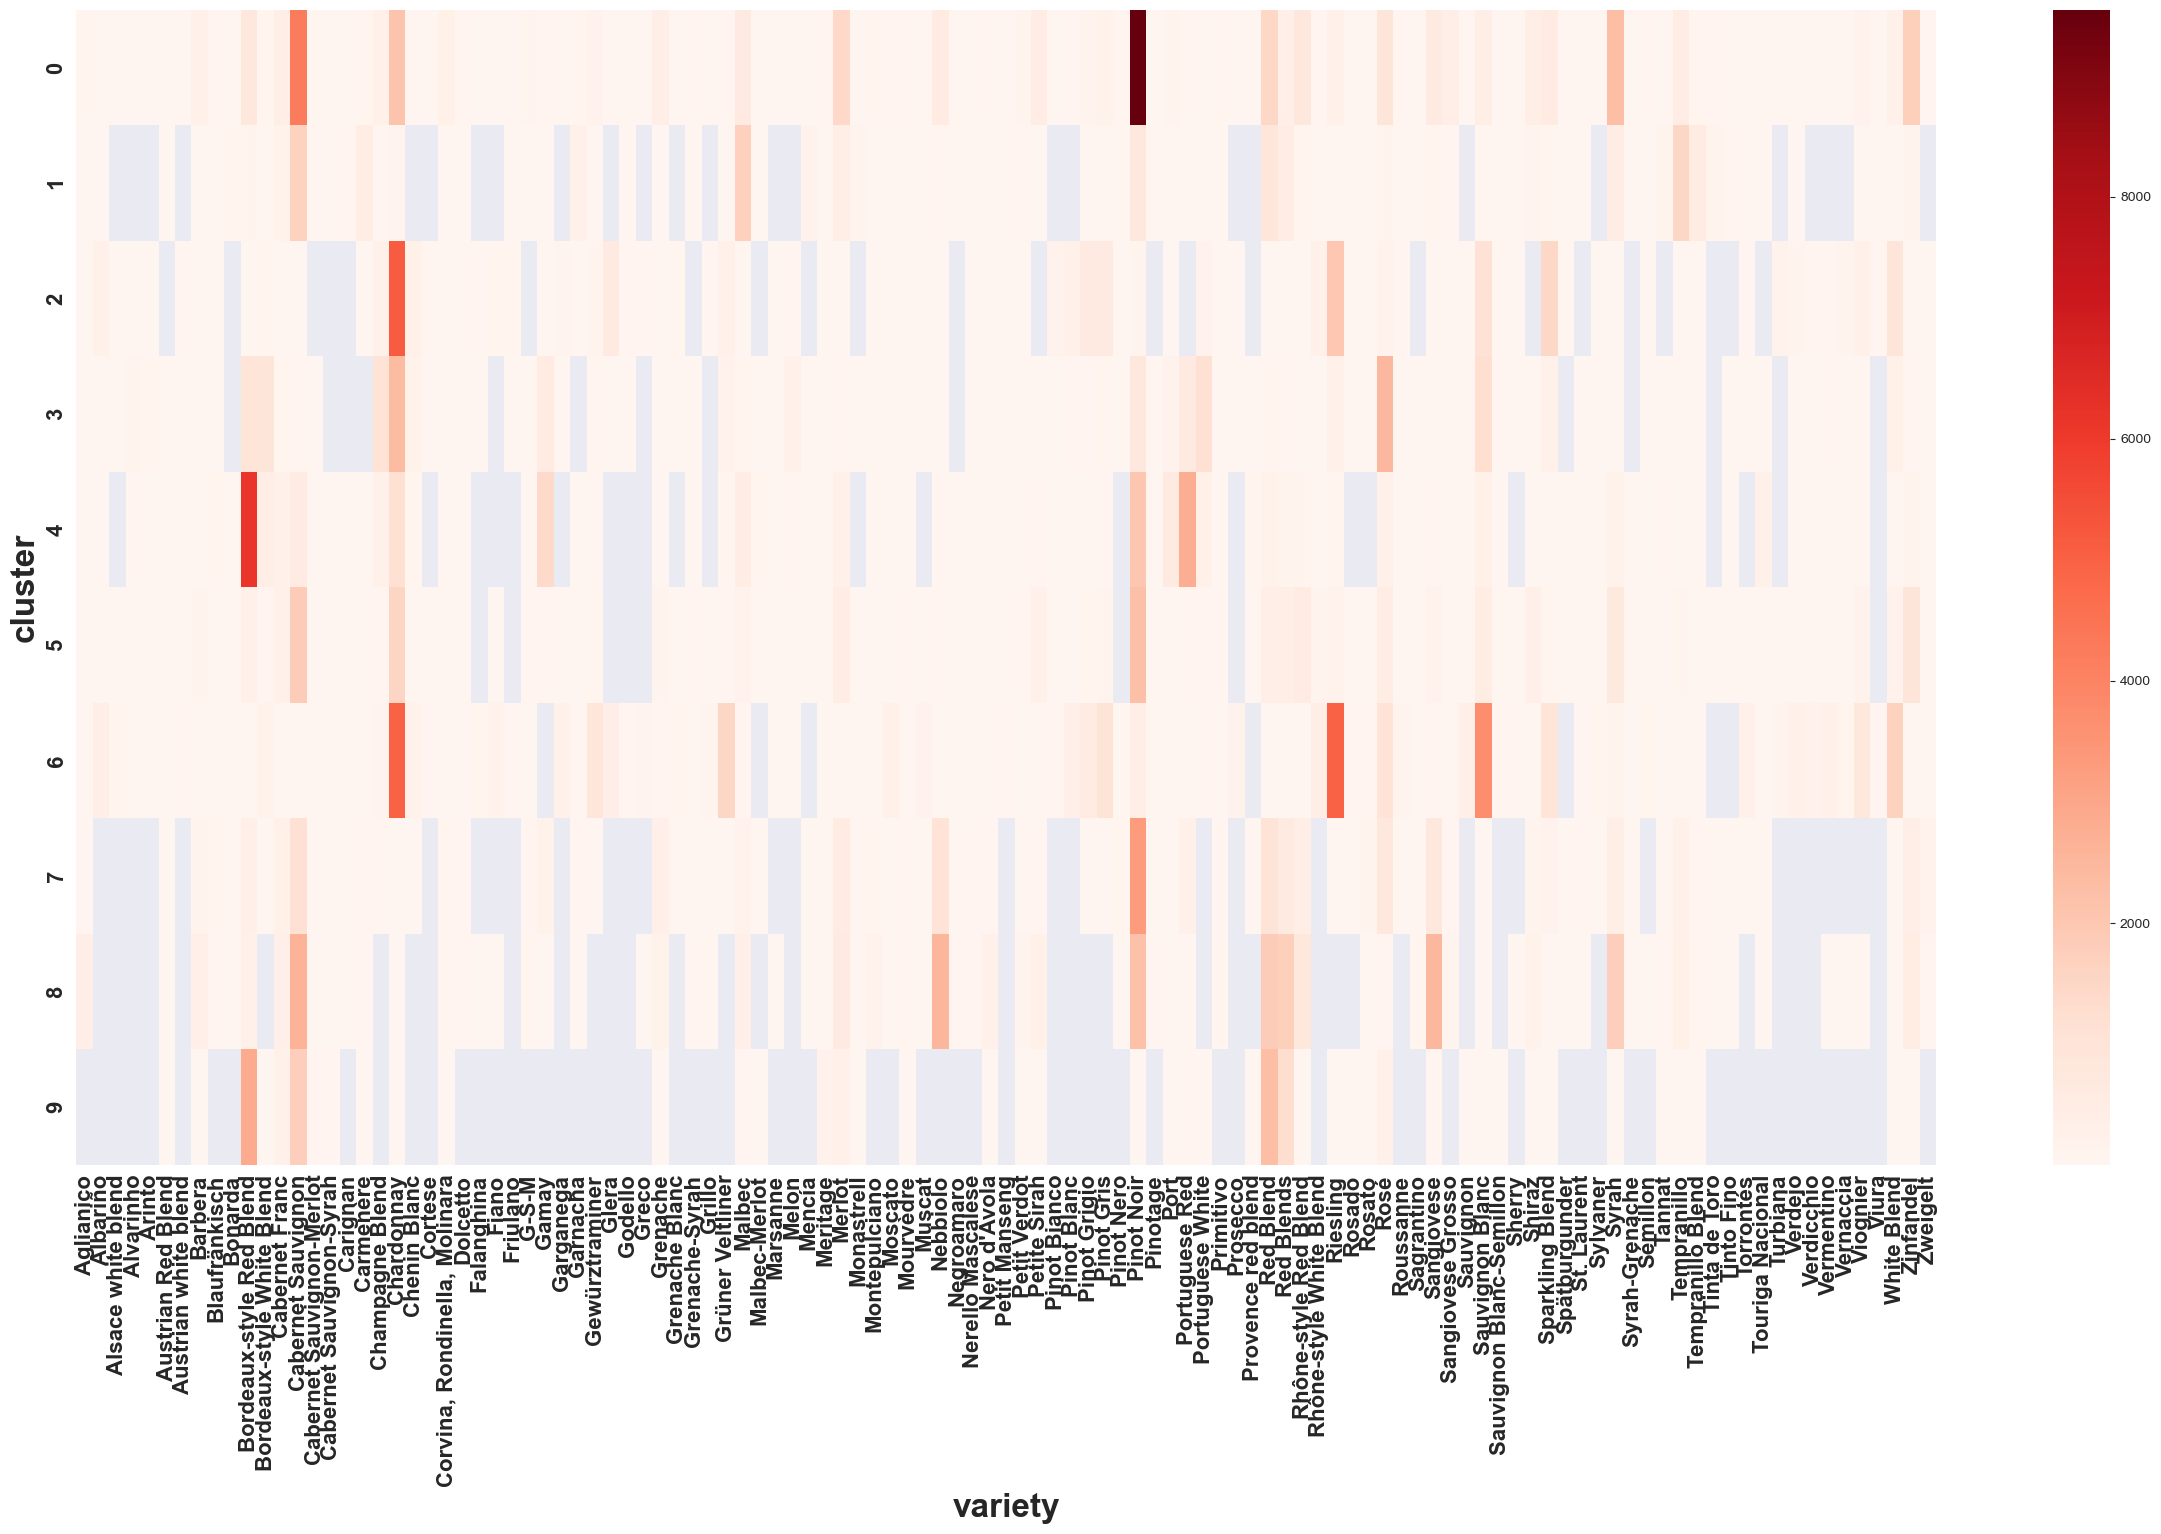

In [110]:
'''Now I want to take a deeper look at each cluster. I want to see if there is one wine variation more prevalent than others in each of the clusters the kMeans algorithm found'''

#new col to map out the clusters
df['cluster'] = kmeans.labels_


clusters = df.groupby(['cluster', 'variety']).size()
fig2, ax2 = plt.subplots(figsize = (30, 15))
sns.heatmap(clusters.unstack(level = 'variety'), ax = ax2, cmap = 'Reds')

ax2.set_xlabel('variety', fontdict = {'weight': 'bold', 'size': 24})
ax2.set_ylabel('cluster', fontdict = {'weight': 'bold', 'size': 24})
for label in ax2.get_xticklabels():
    label.set_size(16)
    label.set_weight("bold")
for label in ax2.get_yticklabels():
    label.set_size(16)
    label.set_weight("bold")

##this actually is interesting but shows us nothing, we want the output for the user to be a wine reccomendation not a cluster ! how do we resolve this?

### KNN INSTEAD
having clusters from kmeans is cool but is this giving the user what we want it to? no not really we have to have nearest recommendation for wines not just how theyre grouped. not useful

this is where we turn to knn.. k means is all about classification but we want to be able to give the user specific wine names
knn lets us use the method .n_neighbours, and we can return the nearest neighbours based on user input (X), and show them distance or top 3 closest

!!! its not about using knn to predict price etc, therefore could use knn regressor or knn classifer. ITS ABOUT the NEAREST VALUE

In [111]:
'''KNN algorithm is different from other machine learning algorithms by the fact that no work is done on the training data rather all the work is done on the testing data. The model just stores the training data in memory and starts applying calculations when testing data comes.'''

'''When testing data comes, or on this case the USER INPUT, its K nearest neighbours are found by calculating the distance with all the stored training data points. The majority target class of k nearest neighbours is predicted as the output for testing data in case of a classification problem and an average of target values of k nearest neighbours is predicted as the output in case of regression problems.'''

'''K Nearest Neighbor is a supervised machine learning algorithm but it can be used for unsupervised tasks as well. In this algorithm, no work is done on the training data hence training data is just stored in the memory.

# When the testing data comes, its distance is calculated with all the training data points to find the k nearest neighbours which make this algorithm computationally very expensive.
#
# We need a fast and optimized method to find the nearest neighbours. Using a tree data structure can speed up the search process. Below are three approaches to finding the nearest neighbours for a data point.'''

'''Neighbors-based classification is a type of instance-based learning or non-generalizing learning: it does not attempt to construct a general internal model, but simply stores instances of the training data. Classification is computed from a simple majority vote of the nearest neighbors of each point: a query point is assigned the data class which has the most representatives within the nearest neighbors of the point.

#If you fit the unsupervised NearestNeighbors model, you will store the data in a data structure based on the value you set for the algorithm argument. And you can then use this unsupervised learner's kneighbors in a model which require neighbour searches'''

'''TREE PARAMETER:::
###Efficient brute-force neighbors searches can be very competitive for small data samples. However, as the number of samples  grows, the brute-force approach quickly becomes infeasible

##To address the computational inefficiencies of the brute-force approach, a variety of tree-based data structures have been invented. In general, these structures attempt to reduce the required number of distance calculations by efficiently encoding aggregate distance information for the sample. The basic idea is that if point  is very distant from point , and point  is very close to point , then we know that points  and  are very distant, without having to explicitly calculate their distance. In this way, the computational cost of a nearest neighbors search can be reduced to  or better. This is a significant improvement over brute-force for large .'''


'''Assuming K is given, strictly speaking, KNN does not have any learning involved, i.e., there are no parameters we can tune to make the performance better. Or we are not trying to optimize an objective function from the training data set. This is a major differences from most supervised learning algorithms.

It is a rule that can be used in production time that can classify or clustering a instance based on its neighbors. Compute neighbors does not require label but label can be used to make the decision for the classification.'''

'Assuming K is given, strictly speaking, KNN does not have any learning involved, i.e., there are no parameters we can tune to make the performance better. Or we are not trying to optimize an objective function from the training data set. This is a major differences from most supervised learning algorithms.\n\nIt is a rule that can be used in production time that can classify or clustering a instance based on its neighbors. Compute neighbors does not require label but label can be used to make the decision for the classification.'

In [112]:
##fit knn using the matrix prior, include ball_tree to speed up cluster classification due to size of df

nn = NearestNeighbors(n_neighbors=5, algorithm='ball_tree')
nn.fit(nlp_df)

##using 10 arbitrarily as it is the clusters the wine flavours fall into on a wine tasting wheel


NearestNeighbors(algorithm='ball_tree')

In [113]:
##look at the silhoutte_Score for this, its not g r e a t
metrics.silhouette_score(nlp_df, df.variety)

-0.023357721085590775

In [114]:
#iterative thru diff cluster numbers, fit the model and look at silhuotte scores
#
# ##save the scores and print
#
# k_range = range(2, 15) ##always start from 2 and yh let not try to use too many, we want clusters for patterns not for tits sake uno
# scores = []
# inertia = []
# for k in k_range:
#     knn = NearestNeighbors(n_neighbors=k, algorithm='ball_tree')
#     knn.fit(nlp_df)
#     scores.append(metrics.silhouette_score(nlp_df, df.variety))
#     # inertia.append(knn.inertia_)

In [115]:
# #plot the silhoite scores that we saved to a lsit against k and see the best,, highest,, score
# plt.plot(k_range, scores)
# plt.xlabel('KNN number')
# plt.ylabel('Silhouette Coefficient')
# plt.grid(False)
#

In [116]:
test = ['zesty, fruity, sweet, oaky']

# Query for similar wines using the test case
new = final_vectoriser.transform(test) ##have to vectorise the results before passing through knn
results = nn.kneighbors(X = new.todense(),n_neighbors = 3, return_distance=True)

results
##^^^ a touple of arrays, but wot does this mean:::?
##gives the nearest result in terms of distnce between 0 and 1 and gives index

C:\Users\odcro\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\Users\odcro\anaconda3\lib\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


(array([[0.78353577, 0.92542735, 0.98376458]]),
 array([[30919, 21708, 49190]], dtype=int64))

In [117]:
# Pull the wine name from 1st value (0) of the 1st array (0) of the 2nd tuple (1) - the 0 index
print(df['variety'][results[1][0][0]])
# Pull the wine name from 1st value (0) of the 1st array (0) of the 1nd tuple (1) - the 0 index
print(df['variety'][results[1][0][1]])
# Pull the wine name from 1st value (0) of the 1st array (0) of the 1nd tuple (1) - the 0 index
print(df['variety'][results[1][0][2]])

Chardonnay
Chardonnay
Cabernet Sauvignon


In [118]:
print(df['title'][results[1][0][0]])
print(df['title'][results[1][0][1]])
print(df['title'][results[1][0][2]])

Donovan-Parke 2010 Chardonnay (California)
Three Sticks 2014 Durell Vineyard Origin Chardonnay (Sonoma Valley)
D'Amante WIne Estate 2017 Cabernet Sauvignon (El Pomar District)


In [119]:
option1_title = df['title'][results[1][0][2]]
option1_variety = df['variety'][results[1][0][2]]

print(f'Based on your input my top recommendation would be the {option1_title}, this is a type of {option1_variety} :)')

Based on your input my top recommendation would be the D'Amante WIne Estate 2017 Cabernet Sauvignon (El Pomar District), this is a type of Cabernet Sauvignon :)


In [123]:
##wine recommendation function
def predict():

    user_wine = input("Please enter the characteristics of a wine you like: ")

    user_wine = [user_wine]

    wine_info = final_vectoriser.transform(user_wine)

    results = nn.kneighbors(wine_info.todense())

    rec_title = [df['title'][results[1][0][i]] for i in range(3)]
    rec_variety = [df['variety'][results[1][0][i]] for i in range(3)]

    recommend1 = print(f'Based on your preferences my top recommendation would be a {rec_variety[0]}, why not try the {rec_title[0]} \n')
    recommend2 = print(f'Based on your preferences my second recommendation would be a {rec_variety[1]}, why not try the {rec_title[1]} \n')
    recommend3 = print(f'Based on your preferences my third recommendation would be a {rec_variety[2]}, why not try the {rec_title[2]} \n')


    return

In [124]:
predict()

Based on your preferences my top recommendation would be a Red Blend, why not try the La Corte 2009 Red (Salice Salentino) 

Based on your preferences my second recommendation would be a Pinot Noir, why not try the Furthermore 2017 Rosé of Pinot Noir (Russian River Valley) 

Based on your preferences my third recommendation would be a Monastrell, why not try the Bocopa 2015 Conde de Alicante Selección Monastrell (Alicante) 



C:\Users\odcro\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\Users\odcro\anaconda3\lib\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
